<a id='1'></a>
<h2 style="font-family: serif; font-size: 35px; background-color: #f6f6f6; color: black; font-weight: bold; border-radius: 100px 100px; text-align: center">
    A Wearable Exam Stress Dataset for Predicting Cognitive Performance in Real-World Settings
</h2>


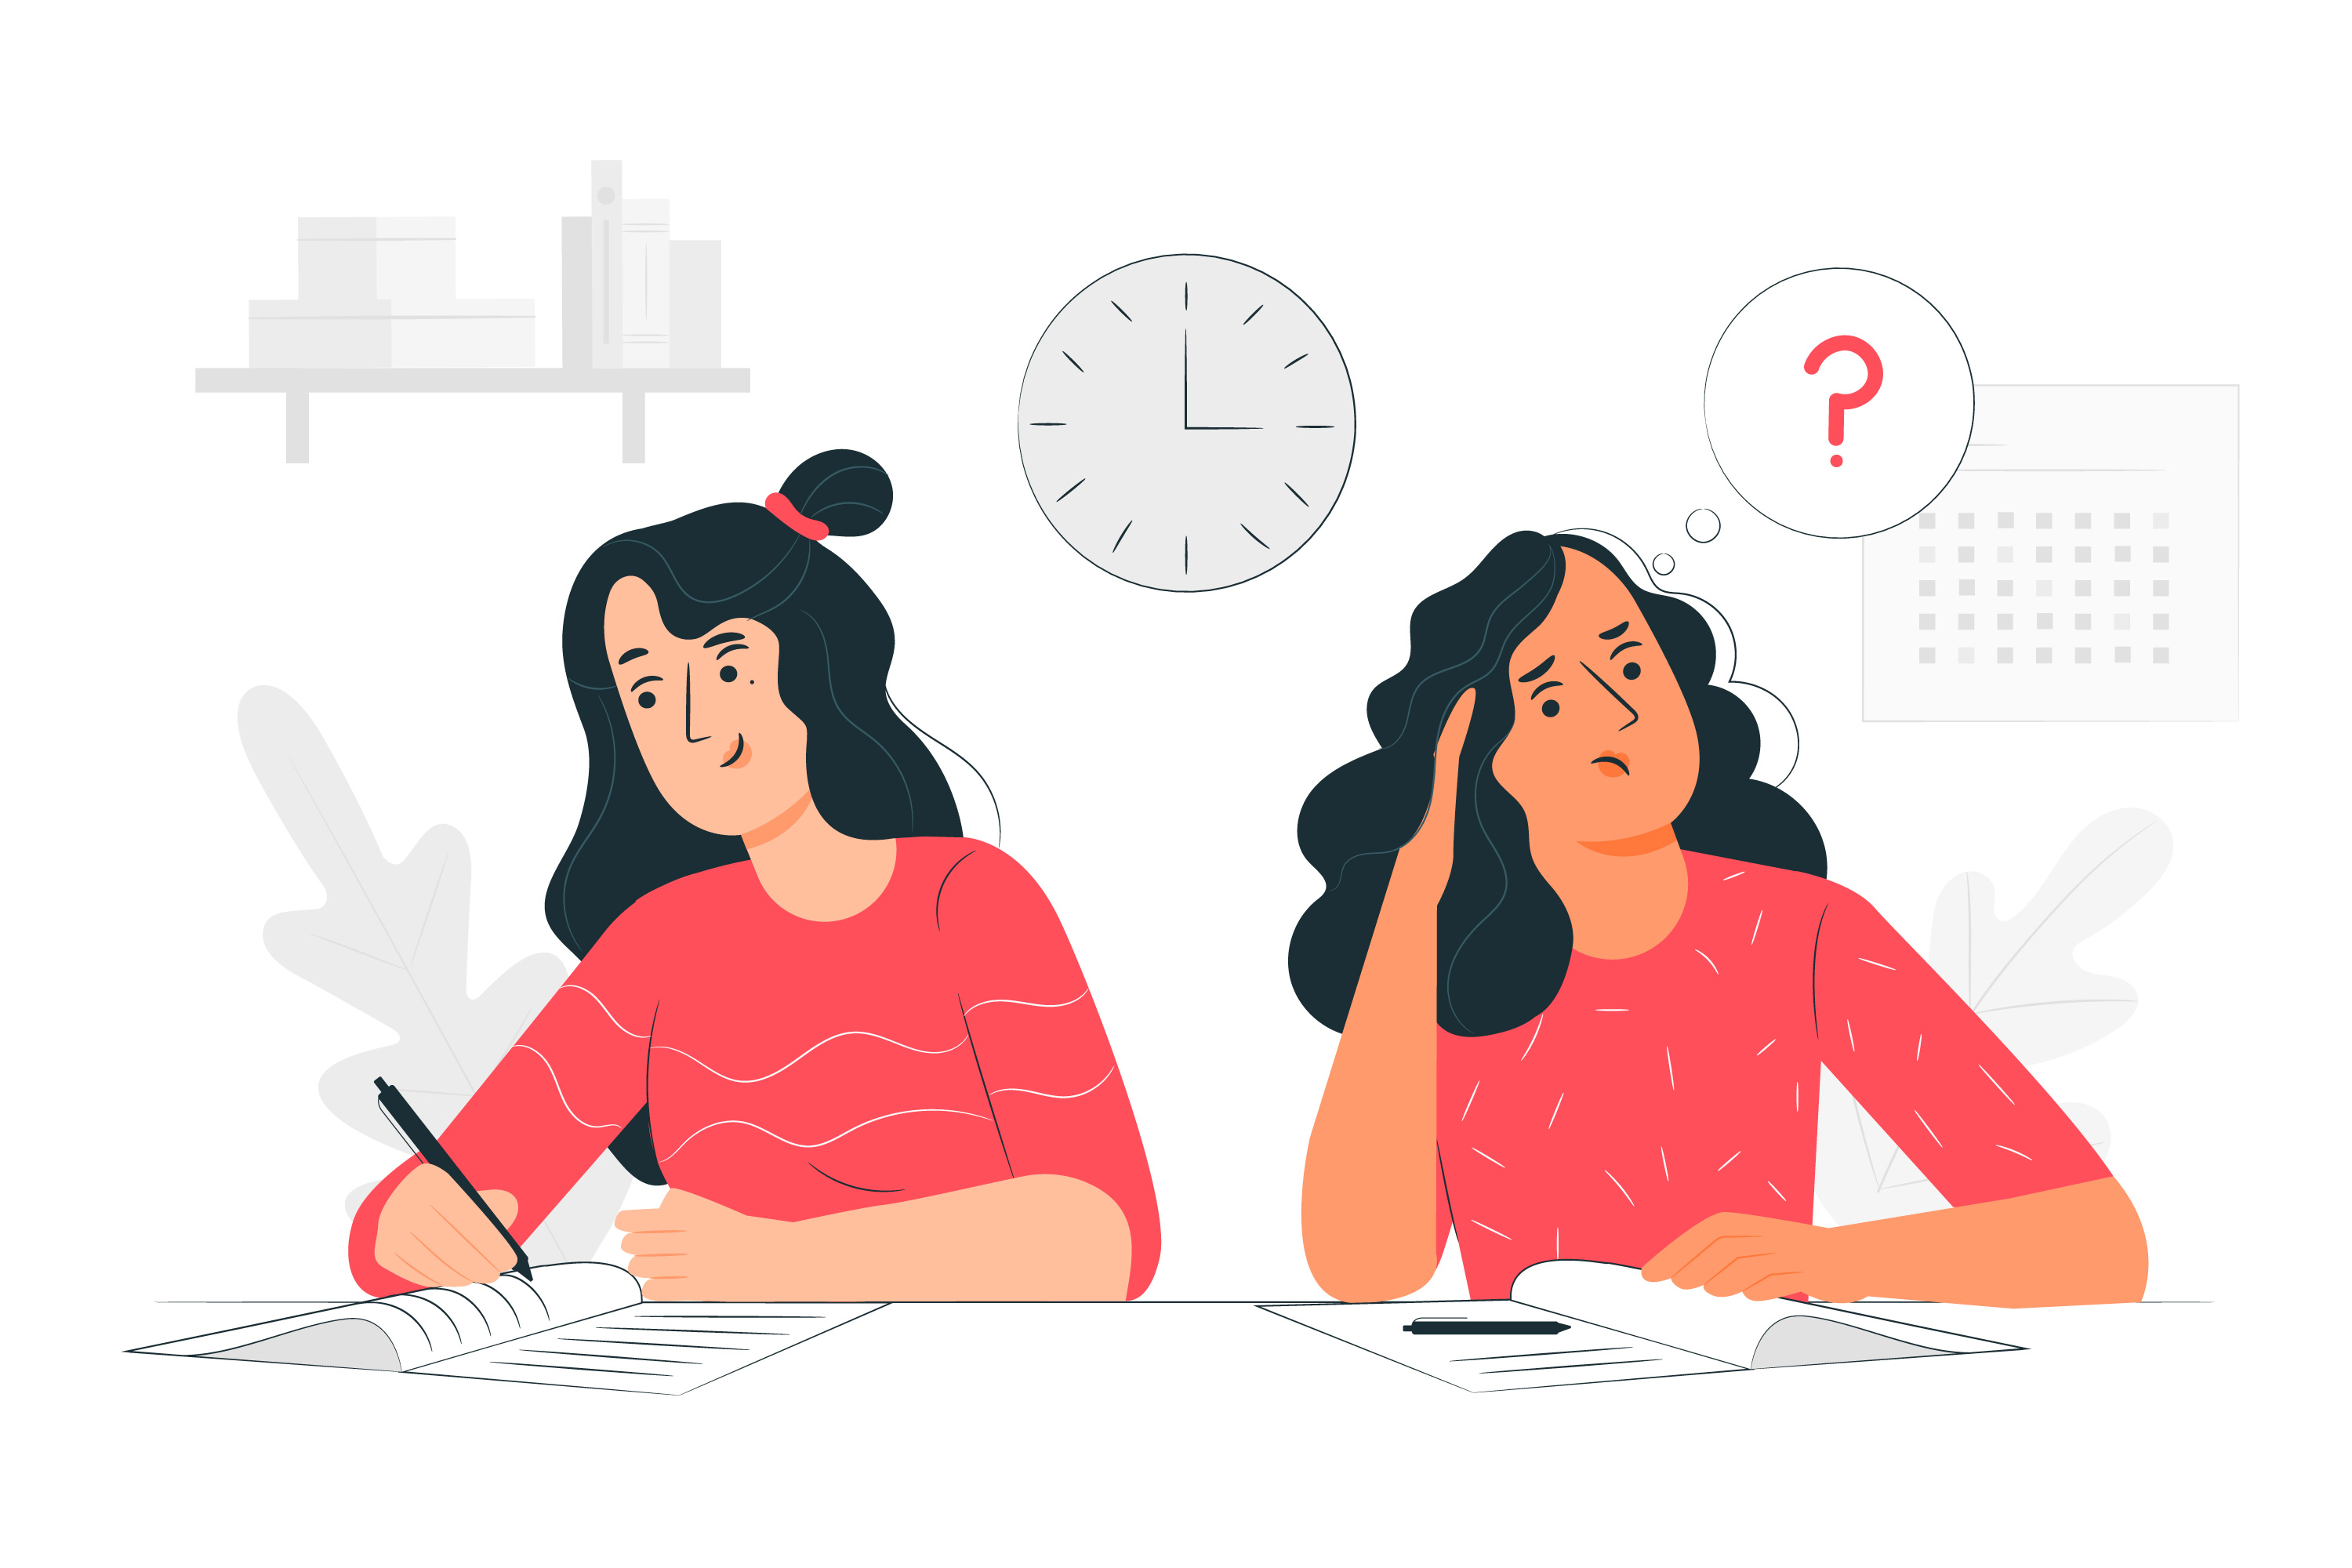

In [3]:
from IPython.display import Image

image_path = '/Users/mayaravi/Downloads/7407443_3659617.jpg'

Image(image_path)


<a id = '1.1'></a>

<h2 style = "background-color: #f6f5f5; color : #fe4a49; font-size: 35px; font-family:garamond; font-weight: normal; border-radius: 100px 100px; text-align: center"> Introduction</h2>

<h4 style = "background-color: white; color : #fe4a49; font-size: 30px; font-family:garamond; font-weight: normal; border-radius: 75px 150px; text-align: left"> Dataset Overview</h4>

<p style="color: navy;">
    This dataset, gathered from a study conducted at the University of Houston, provides a unique perspective on how students' physiological responses correlate with their academic performance under stress. Unlike previous studies that have focused on short-term reactions to artificial stressors in laboratory settings, this dataset captures real-world data from students undergoing actual exam stress. The study utilizes the FDA-approved Empatica E4 wristband to record various physiological signals.
</p>


<h4 style = "background-color: white; color : #fe4a49; font-size: 30px; font-family:garamond; font-weight: normal; border-radius: 75px 150px; text-align: left"> Study Objective</h4>

<p style="color: navy;">
    The primary aim of this dataset is to bridge the gap between laboratory-based stress response data and real-world stress responses, particularly in an academic setting. By analyzing data from actual exam situations, the study seeks to offer deeper insights into how stress impacts cognitive performance, as evidenced through exam grades.
</p>


<h4 style = "background-color: white; color : #fe4a49; font-size: 30px; font-family:garamond; font-weight: normal; border-radius: 75px 150px; text-align: left"> Data Description</h4>

<p style="color: navy;">
    The dataset is organized into six distinct sheets, each containing different aspects of the study data:
    <br><br>
    <strong>Grades:</strong> This sheet contains the academic performance data of the participants. It likely includes their grades for the exams conducted during the study period.
    <br><br>
    <strong>Demography:</strong> This sheet provides demographic information about the participants. This might include data such as age, gender, race, or other relevant demographic details that could be significant for analyzing stress responses.
    <br><br>
    <strong>EDA (Electrodermal Activity):</strong> This sheet records the electrodermal activity data of the participants. EDA is a measure of the skin's electrical conductance and is often used as an indicator of psychological or physiological arousal.
    <br><br>
    <strong>HR (Heart Rate):</strong> The HR sheet contains data related to the participants' heart rates. This physiological measure can be a key indicator of stress levels and overall cardiovascular response to stress.
    <br><br>
    <strong>Temp (Temperature):</strong> This sheet tracks the skin surface temperature data. Temperature can fluctuate with changes in blood flow, which in turn can be influenced by stress and emotional states.
    <br><br>
    <strong>IBI (Interbeat Interval):</strong> The IBI sheet captures data on the time interval between heartbeats. Variations in IBI can provide insights into the autonomic nervous system's activity, particularly in response to stress.
</p>


<a id = '1.1'></a>

<h2 style = "background-color: #f6f5f5; color : #fe4a49; font-size: 35px; font-family:garamond; font-weight: normal; border-radius: 100px 100px; text-align: center">1.1 Libraries and Utilities</h2>

In [283]:
# Basic Libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from datetime import datetime 
from collections import Counter
import re 
import random

# Visualization Modules
import plotly.express as px
from wordcloud import WordCloud
from pywaffle import Waffle

# Date and Time Utilities
from dateutil.relativedelta import relativedelta

# Machine Learning Preprocessing
from sklearn.preprocessing import LabelEncoder

# Additional Setup (Note: Run this line separately in your Jupyter Notebook)
!conda install -c conda-forge wordcloud -y


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0



# All requested packages already installed.



<h2 style = "background-color: #f6f5f5; color : #fe4a49; font-size: 35px; font-family:garamond; font-weight:normal; border-radius: 100px 100px; text-align: center">1.2 Data Preprocessing </h2>

<p style="color: navy;">
    This section includes:
    <ol>
        <li><strong>Loading of Data:</strong> This involves reading each sheet in the Excel file into a separate DataFrame.</li>
        <li><strong>Data Preprocessing:</strong>
            <ul>
                <li><em>Removing Null Values:</em> Identify and remove rows with null values in each sheet.</li>
                <li><em>Standardizing Column Names:</em> Ensure that all column names across sheets are consistent. For example, unifying 'student id' to have the same format (like 's10' to 'S010') and making sure terms like 'midterm 1' and 'Midterm 1' are standardized.</li>
                <li><em>Identifying and Resolving Inconsistencies:</em> Beyond column names, we also need to identify any inconsistencies in the data itself, such as different representations of the same information.</li>
            </ul>
        </li>
    </ol>
</p>


<h4 style = "background-color: white; color : #fe4a49; font-size: 30px; font-family:garamond; font-weight: normal; border-radius: 75px 150px; text-align: left"> Loading data </h4>

In [282]:
file_path = '/Users/mayaravi/Downloads/Exam Stress Final.xlsx'

grades_df = pd.read_excel(file_path, 'Grades')
demography_df = pd.read_excel(file_path, 'Demography')
eda_df = pd.read_excel(file_path, 'EDA')
hr_df = pd.read_excel(file_path, 'HR')
temp_df = pd.read_excel(file_path, 'Temp')
ibi_df = pd.read_excel(file_path, 'IBI')


<h4 style = "background-color: white; color : #fe4a49; font-size: 30px; font-family:garamond; font-weight: normal; border-radius: 75px 150px; text-align: left"> Pre-processing Data </h4>

In [281]:
def standardize_column_names(df):
    df.columns = df.columns.str.strip()  # Remove leading/trailing whitespace
    df.columns = df.columns.str.lower()  # Convert to lowercase
    df.columns = df.columns.str.replace(' ', '_')  # Replace spaces with underscores
    return df

def standardize_student_ids(df, id_column):
    if id_column in df.columns:
        df[id_column] = df[id_column].str.upper().str.zfill(4)
    return df

dfs = [grades_df, demography_df, eda_df, hr_df, temp_df, ibi_df]

for df in dfs:
    df.dropna(inplace=True)
  
    df = standardize_column_names(df)
    
    df = standardize_student_ids(df, 'Student_id')


<h4 style = "background-color: white; color : #fe4a49; font-size: 30px; font-family:garamond; font-weight: normal; border-radius: 75px 150px; text-align: left"> Color Palette for Notebook  </h4>

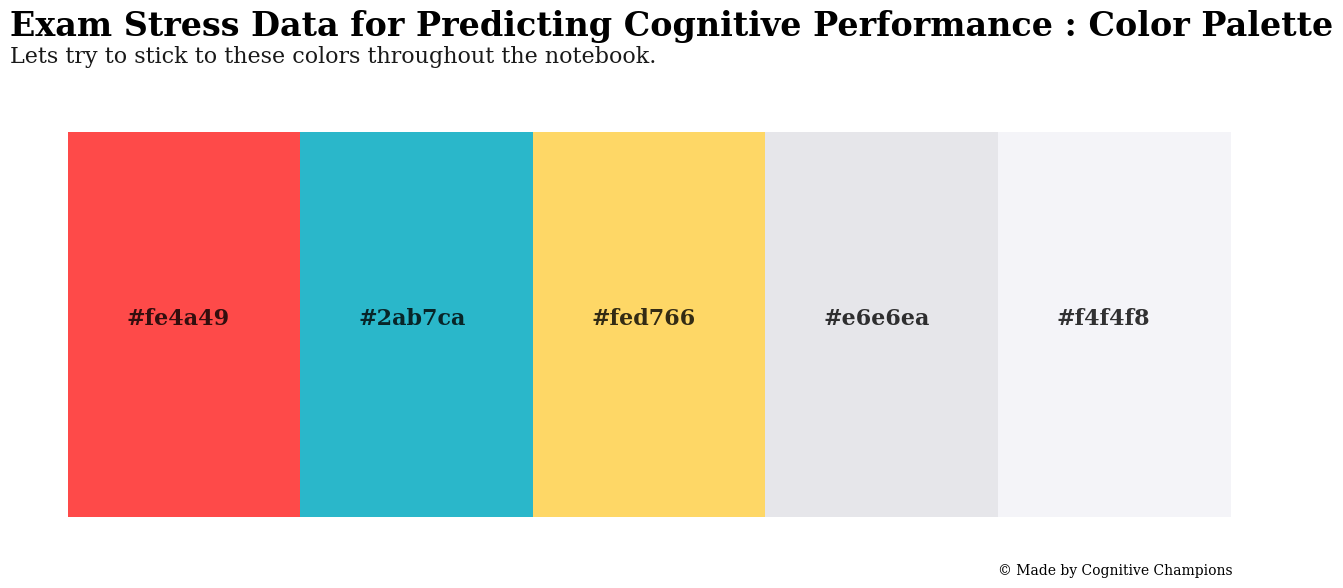

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
colors= ['#fe4a49' ,'#2ab7ca' ,'#fed766' ,'#e6e6ea' ,'#f4f4f8']

sns.palplot(colors,size = 3)

plt.gcf().set_size_inches(15,5)

plt.text(-0.75,-0.75, 'Exam Stress Data for Predicting Cognitive Performance : Color Palette',{'fontfamily':'serif', 'size':24, 'weight':'bold'})
plt.text(-0.75,-0.68, 'Lets try to stick to these colors throughout the notebook.',{'fontfamily':'serif', 'size':16},alpha = 0.9)
for idx,values in enumerate(colors):
    plt.text(idx-0.25,0, colors[idx],{'fontfamily':'serif', 'size':16, 'weight':'bold','color':'black'}, alpha =0.8)
plt.gcf().set_facecolor('white')
plt.box(None)
plt.axis('off')
plt.text(3.5,0.65,'© Made by Cognitive Champions',{'fontfamily':'serif', 'size':10,  'color':'black'})
plt.show()


<h2 style = "background-color: #f6f5f5; color : #fe4a49; font-size: 35px; font-family:garamond; font-weight:normal; border-radius: 100px 100px; text-align: center">1.3 Hackathon Questions ( 1 through 80 ) </h2>

<h4 style = "background-color: white; color : #fe4a49; font-size: 30px; font-family:garamond; font-weight: normal; border-radius: 75px 150px; text-align: left"> Level Of Difficulty Of Questions  </h4>

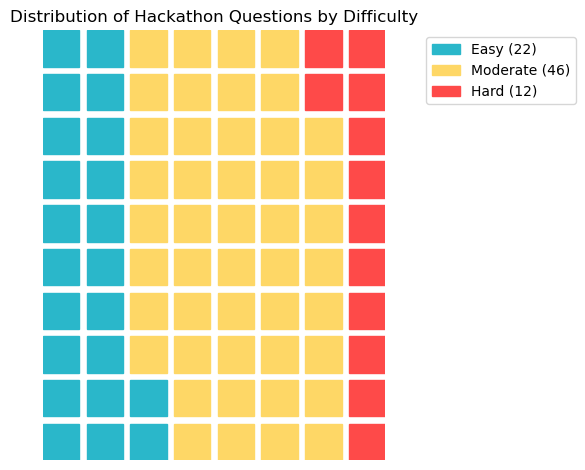

In [135]:
data = {
    'Easy': 22,
    'Moderate': 46,
    'Hard': 12
}

colors = ["#2ab7ca", "#fed766","#fe4a49"]

fig = plt.figure(
    FigureClass=Waffle, 
    rows=10,  # Number of rows
    values=data,  # Data
    colors=colors,  # New colors for each category
    title={'label': 'Distribution of Hackathon Questions by Difficulty', 'loc': 'center'},  # Title
    labels=["{} ({})".format(k, v) for k, v in data.items()],  # Labels for each category
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}  # Adjust legend position
)

plt.tight_layout()

plt.show()


<h4 style = "background-color: white; color : #fe4a49; font-size: 30px; font-family:garamond; font-weight: normal; border-radius: 75px 150px; text-align: left"> Distribution Of Questions By Category  </h4>

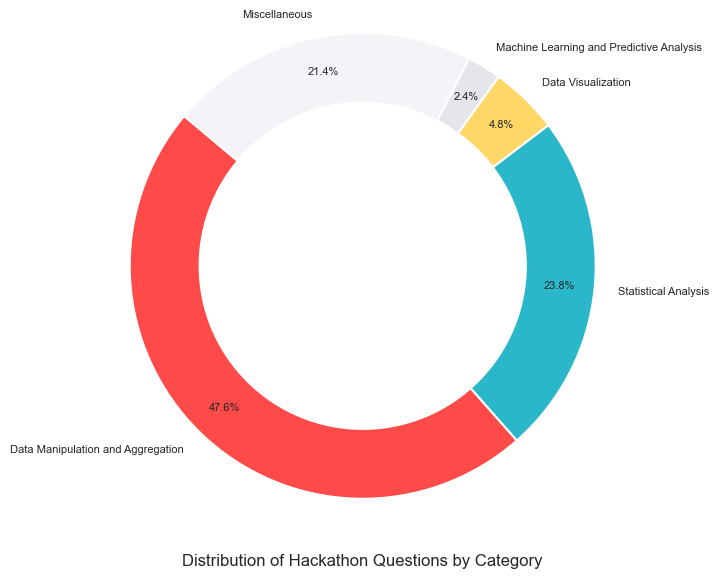

In [260]:
import matplotlib.pyplot as plt

category_counts_updated = {
    'Data Manipulation and Aggregation': 20,
    'Statistical Analysis': 10,
    'Data Visualization': 2,
    'Machine Learning and Predictive Analysis': 1,
    'Miscellaneous': 9
}
category_names_updated = list(category_counts_updated.keys())
category_values_updated = list(category_counts_updated.values())
colors = ['#fe4a49', '#2ab7ca', '#fed766', '#e6e6ea', '#f4f4f8']  # Updated color palette

fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(category_values_updated, labels=category_names_updated, colors=colors, startangle=140, autopct='%1.1f%%', pctdistance=0.85, textprops={'fontsize': 8})

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(centre_circle)

ax.axis('equal')
plt.tight_layout()

# Add the title below the pie chart
plt.title('Distribution of Hackathon Questions by Category', fontsize=12, y=-0.1)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.85)

plt.show()


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">1. Using the mean interbeat interval per minute, calculate the Root Mean Square of successive differences for any 30 minute interval and add this to IBI.</h3>


<p style="color: navy;">
    <strong>Approach for Calculating Root Mean Square of Successive Differences (RMSSD):</strong>
    <br><br>
    <strong>Load IBI Data</strong>
    <br>
    Filter Data for First 30 Minutes: For each student and each exam, select only the IBI data corresponding to the first 30 minutes.
    <br><br>
    <strong>Calculate Successive Differences:</strong> For each IBI sequence, compute the differences between successive IBI values.
    <br><br>
    <strong>Square the Differences:</strong> Square each of the successive differences calculated in the previous step.
    <br><br>
    <strong>Calculate Mean of Squared Differences:</strong> Compute the average of the squared differences for each student and exam.
    <br><br>
    <strong>Compute RMSSD:</strong> Take the square root of the mean of squared differences to obtain the RMSSD. This value represents the variability in heart rate intervals for the first 30 minutes of each exam.
    <br><br>
    Here we have considered the first consecutive 30 mins in every exam.
</p>


In [279]:
ibi_df = pd.read_excel(file_path, 'IBI')

def calculate_rmssd(ibi_values):
    diff = np.diff(ibi_values)
    squared_diff = np.square(diff)
    mean_squared_diff = np.mean(squared_diff)
    rmssd = np.sqrt(mean_squared_diff)
    return rmssd

ibi_30_min = ibi_df[ibi_df['Time in mins'] < 30]

ibi_30_min_rmssd = ibi_30_min.groupby(['Student_id', 'Exam'])['IBI'].apply(calculate_rmssd).reset_index()
ibi_30_min_rmssd.rename(columns={'IBI': 'RMSSD'}, inplace=True)

merged_ibi_df = pd.merge(ibi_df, ibi_30_min_rmssd, on=['Student_id', 'Exam'], how='left')

print("RMSSD Data:")
print(ibi_30_min_rmssd)

print("\nMerged IBI Data with RMSSD:")
print(merged_ibi_df)


RMSSD Data:
   Student_id       Exam     RMSSD
0         S01      final  0.052773
1         S01  midterm 1  0.064696
2         S01  midterm 2  0.169314
3        S010      final  0.063190
4        S010  midterm 1  0.109574
5        S010  midterm 2  0.061999
6         S02      final  0.050421
7         S02  midterm 1  0.076596
8         S02  midterm 2  0.114408
9         S03      final  0.098525
10        S03  midterm 1  0.085342
11        S03  midterm 2  0.041189
12        S04      final  0.182478
13        S04  midterm 1  0.094365
14        S04  midterm 2  0.052094
15        S05      final  0.252631
16        S05  midterm 1  0.085145
17        S05  midterm 2  0.056564
18        S06      final  0.099109
19        S06  midterm 1  0.072895
20        S06  midterm 2  0.066961
21        S07      final  0.151206
22        S07  midterm 1  0.118629
23        S07  midterm 2  0.144454
24        S08      final  0.176079
25        S08  midterm 1  0.063202
26        S08  midterm 2  0.114362
27      

<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">2. Group the rows in the file EDA into 3 parts based on time: First, Second, Third part of each exam</h3>

<p style="color: navy;">
    <strong>Function to Assign Exam Part Approach:</strong>
    <br><br>
    A function <code>assign_exam_part</code> is defined to categorize each data point into 'First Part', 'Second Part', or 'Third Part' of the exam. This categorization is based on the time elapsed:
    <ul>
        <li>If the time is within the first third of the total exam duration, it's categorized as 'First Part'.</li>
        <li>If the time is within the second third, it's categorized as 'Second Part'.</li>
        <li>If the time is in the final third, it's categorized as 'Third Part'.</li>
    </ul>
</p>


In [129]:
eda_df = pd.read_excel(file_path, 'EDA')

def assign_exam_part(row, total_duration):
    if row['Time in mins'] <= total_duration / 3:
        return 'First Part'
    elif row['Time in mins'] <= 2 * total_duration / 3:
        return 'Second Part'
    else:
        return 'Third Part'

exam_durations = eda_df.groupby(['Student_id', 'Exam'])['Time in mins'].max()

eda_df['Exam Part'] = None
for (student_id, exam), duration in exam_durations.items():
    eda_df.loc[(eda_df['Student_id'] == student_id) & (eda_df['Exam'] == exam), 'Exam Part'] = eda_df.apply(
        lambda row: assign_exam_part(row, duration) if (row['Student_id'] == student_id and row['Exam'] == exam) else row['Exam Part'], axis=1)

print("EDA Data with Exam Parts:")
print(eda_df.head())


EDA Data with Exam Parts:
     EDA  Time in mins Student_id   Exam   Exam Part
0  0.040             1        S01  final  First Part
1  0.024             2        S01  final  First Part
2  0.024             3        S01  final  First Part
3  0.024             4        S01  final  First Part
4  0.024             5        S01  final  First Part


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">3. Based on the calculation in question 2, which part of the exam did students suffer maximum stress? You may assume that higher recorded skin conductance co-incides with high levels of stress</h3>

In [36]:
average_eda_per_part = eda_df.groupby(['Student_id', 'Exam', 'Exam Part'])['EDA'].mean().reset_index()

max_stress_part = average_eda_per_part.sort_values(by='EDA', ascending=False).drop_duplicates(['Student_id', 'Exam'])

print("Part of the Exam with Maximum Stress:")
print(max_stress_part.head())


Part of the Exam with Maximum Stress:
   Student_id       Exam    Exam Part       EDA
58        S06  midterm 1  Second Part  1.251565
42        S04  midterm 2   First Part  1.083176
73        S08      final  Second Part  0.883172
36        S04      final   First Part  0.874864
4         S01  midterm 1  Second Part  0.759113


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">4. Using Root Mean Square of Successive differences calculated in Q1, calculate and store HRV per exam for every student.</h3>


<p style="color: navy;">
    <strong>Approach for Calculating Heart Rate Variability (HRV):</strong>
    <br><br>
    Determine Individual Exam Duration for every student for every exam.
    <br><br>
    Merge RMSSD with Exam Duration Data.
    <br><br>
    Adjust RMSSD for HRV: Scale RMSSD by 600 milliseconds and adjust for the actual exam duration. This is done by multiplying the RMSSD by the square root of the ratio of the exam duration to the 30-minute interval.
    <br><br>
    HRV: 600 * RMSSD
</p>


In [280]:
ibi_df = pd.read_excel(file_path, 'IBI')

ibi_30_min = ibi_df[ibi_df['Time in mins'] < 30]

ibi_30_min_rmssd = ibi_30_min.groupby(['Student_id', 'Exam'])['IBI'].apply(calculate_rmssd).reset_index()
ibi_30_min_rmssd.rename(columns={'IBI': 'RMSSD'}, inplace=True)

ibi_30_min_rmssd['HRV'] = ibi_30_min_rmssd['RMSSD'] * 600

print("HRV Data:")
print(ibi_30_min_rmssd[['Student_id', 'Exam', 'HRV']])


HRV Data:
   Student_id       Exam         HRV
0         S01      final   31.663860
1         S01  midterm 1   38.817401
2         S01  midterm 2  101.588213
3        S010      final   37.914113
4        S010  midterm 1   65.744353
5        S010  midterm 2   37.199462
6         S02      final   30.252829
7         S02  midterm 1   45.957629
8         S02  midterm 2   68.644825
9         S03      final   59.114900
10        S03  midterm 1   51.205351
11        S03  midterm 2   24.713154
12        S04      final  109.486712
13        S04  midterm 1   56.619283
14        S04  midterm 2   31.256359
15        S05      final  151.578841
16        S05  midterm 1   51.087278
17        S05  midterm 2   33.938233
18        S06      final   59.465548
19        S06  midterm 1   43.736941
20        S06  midterm 2   40.176859
21        S07      final   90.723889
22        S07  midterm 1   71.177210
23        S07  midterm 2   86.672487
24        S08      final  105.647376
25        S08  midterm 1   3

<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">5. Join all tables to produce one file that contains all student 1's readings for IBI, EDA , HR and temp</h3>

In [137]:
xls = pd.ExcelFile(file_path)

eda_df = pd.read_excel(xls, 'EDA')
hr_df = pd.read_excel(xls, 'HR')
temp_df = pd.read_excel(xls, 'Temp')
ibi_df = pd.read_excel(xls, 'IBI')

eda_student1 = eda_df[eda_df['Student_id'] == 'S01']
hr_student1 = hr_df[hr_df['Student_id'] == 'S01']
temp_student1 = temp_df[temp_df['Student_id'] == 'S01']
ibi_student1 = ibi_df[ibi_df['Student_id'] == 'S01']

merged_df_s01 = pd.merge(eda_student1, hr_student1, on=['Time in mins', 'Student_id', 'Exam'], how='outer')
merged_df_s01 = pd.merge(merged_df_s01, temp_student1, on=['Time in mins', 'Student_id', 'Exam'], how='outer')
merged_df_s01 = pd.merge(merged_df_s01, ibi_student1, on=['Time in mins', 'Student_id', 'Exam'], how='outer')
merged_df_s01.rename(columns={'EDA': 'EDA (µS)', 'HR': 'HR (bpm)', 'TEMP': 'Temp (°C)', 'IBI': 'IBI (ms)'}, inplace=True)

merged_df_s01.head()


,EDA (µS),Time in mins,Student_id,Exam,HR (bpm),Temp (°C),IBI (ms)
0,0.040,1.0,S01,final,119.023,22.080,0.473
1,0.024,2.0,S01,final,130.879,22.048,NaN
2,0.024,3.0,S01,final,131.586,22.022,0.444
3,0.024,4.0,S01,final,109.852,22.339,0.496
4,0.024,5.0,S01,final,81.178,22.416,NaN


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">6. Calulate the age and Display Age and drop the Date of Birth with  iteratively.  (Replace DOB for other questions when complete)</h3>

In [139]:
def calculate_age(dob, reference_date):
    return reference_date.year - dob.year - ((reference_date.month, reference_date.day) < (dob.month, dob.day))

def load_and_modify_demography(file_path):
    demography_df = pd.read_excel(file_path, 'Demography')
    current_date = datetime.now()
    demography_df['Age'] = demography_df['DOB'].apply(lambda dob: calculate_age(dob, current_date))

    # Using an iterative loop to drop 'DOB' column
    for column in demography_df.columns:
        if column == 'DOB':
            demography_df.drop(column, axis=1, inplace=True)
            break

    return demography_df
modified_demography_df = load_and_modify_demography(file_path)
print(modified_demography_df)


  Student_id First Name  Last Name Gender     Race  Age
0        S01    Barbara    Walters      F    White   14
1        S02       Nora      Jones      F    White   14
2        S03    Gabriel    Willows      F    Asian   14
3        S04       John        Doe      M    Asian   14
4        S05       Jane        Doe      F  African   14
5        S06        Pat     Murray      M  African   15
6        S07      Roger  Frederick      M  African   13
7        S08       John      Wills      M    White   14
8        S09       Paul    Cartney      M    White   14
9        S10     Janice      Smith      F  Spanish   14


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">7. Using numpy functions, transpose and multiply the following arrays
a=np.arange(4).reshape(2,2)
b=np.arange(6).reshape(3,2)</h3>

In [140]:
a = np.arange(4).reshape(2, 2)
b = np.arange(6).reshape(3, 2)
b_transposed = b.T
result = np.dot(a, b_transposed)
print(result)


[[ 1  3  5]
 [ 3 13 23]]


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">8. Write a Python program to create an array of 5 integers and display the array items in reverse order</h3>

In [141]:
array = np.array([1, 2, 3, 4, 5])
reversed_array = array[::-1]
print("Original Array:", array)
print("Reversed Array:", reversed_array)


Original Array: [1 2 3 4 5]
Reversed Array: [5 4 3 2 1]


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">9. What was the average grade for all students in the final exam vs both midterms</h3>

In [143]:
grades_df = pd.read_excel(file_path, 'Grades')
final_exam_avg = grades_df['final'].mean()
midterm1_avg = grades_df['Midterm 1'].mean()
midterm2_avg = grades_df['Midterm 2'].mean()
combined_midterm_avg = (midterm1_avg + midterm2_avg) / 2
print("Average score for the final exam:", final_exam_avg)
print("Average score for Midterm 1:", midterm1_avg)
print("Average score for Midterm 2:", midterm2_avg)
print("Combined average score for both midterms:", combined_midterm_avg)


Average score for the final exam: 156.7
Average score for Midterm 1: 77.5
Average score for Midterm 2: 69.9
Combined average score for both midterms: 73.7


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">10. Which students basal body temperature was highest during the second part of the exam?</h3>

In [147]:
def find_highest_temp_student(temp_df, exam_name):
    temp_exam_durations = temp_df.groupby(['Student_id', 'Exam'])['Time in mins'].max()
    temp_df['Exam Part'] = temp_df.apply(lambda row: assign_exam_part(row, temp_exam_durations[(row['Student_id'], row['Exam'])]), axis=1)
    second_part_temp = temp_df[(temp_df['Exam Part'] == 'Second Part') & (temp_df['Exam'] == exam_name)]
    highest_temp_student = second_part_temp.loc[second_part_temp['TEMP'].idxmax()]
    return highest_temp_student

highest_temp_midterm1 = find_highest_temp_student(temp_df, 'Midterm 1')
highest_temp_midterm2 = find_highest_temp_student(temp_df, 'Midterm 2')
highest_temp_final = find_highest_temp_student(temp_df, 'final')

print("Student with the highest temperature during the second part of each exam:")
print(f"Midterm 1: Student ID - {highest_temp_midterm1['Student_id']}, Temperature - {highest_temp_midterm1['TEMP']}")
print(f"Midterm 2: Student ID - {highest_temp_midterm2['Student_id']}, Temperature - {highest_temp_midterm2['TEMP']}")
print(f"Final: Student ID - {highest_temp_final['Student_id']}, Temperature - {highest_temp_final['TEMP']}")


Student with the highest temperature during the second part of each exam:
Midterm 1: Student ID - S02, Temperature - 34.175
Midterm 2: Student ID - S02, Temperature - 35.134
Final: Student ID - S02, Temperature - 36.042


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fa4a49; border-radius: 100px 100px; text-align:left">11. What are the top 3 grades in the final exam? What % of the top 3 grades belonged to males vs females? </h3>

In [151]:
def find_top_grades_and_gender_percentage(file_path):

    merged_df = pd.merge(grades_df, demography_df, on='Student_id')

    top_3_final_grades = merged_df.nlargest(3, 'final')

    male_top_3_percentage = (top_3_final_grades['Gender'] == 'M').mean() * 100
    female_top_3_percentage = (top_3_final_grades['Gender'] == 'F').mean() * 100

    print("Top 3 Grades in the Final Exam:")
    print(top_3_final_grades[['Student_id', 'First Name', 'Last Name', 'Gender', 'final']])
    print("\nPercentage of Top 3 Grades Belonging to Males: {:.2f}%".format(male_top_3_percentage))
    print("Percentage of Top 3 Grades Belonging to Females: {:.2f}%".format(female_top_3_percentage))


find_top_grades_and_gender_percentage(file_path)


Top 3 Grades in the Final Exam:
  Student_id First Name Last Name Gender  final
2        S03    Gabriel   Willows      F    188
7        S08       John     Wills      M    184
0        S01    Barbara   Walters      F    182

Percentage of Top 3 Grades Belonging to Males: 33.33%
Percentage of Top 3 Grades Belonging to Females: 66.67%


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fa4a49; border-radius: 100px 100px; text-align:left">12. Phonebook={"john":938477566,"Jack":938377264,"Jill":947662781}  ,find the phone number of Joe </h3>

In [152]:
phonebook = {"john": 938477566, "Jack": 938377264, "Jill": 947662781}

joe_phone_number = phonebook.get("Joe", "Not found")

print("Phone number for Joe:", joe_phone_number)


Phone number for Joe: Not found


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fa4a49; border-radius: 100px 100px; text-align:left">13. How many minutes did the midterm 2 last( on average) for all 10 students </h3>

Using data from EDA Sheet

In [154]:
midterm2_eda = eda_df[eda_df['Exam'] == 'midterm 2']

max_times_midterm2 = midterm2_eda.groupby('Student_id')['Time in mins'].max()

average_duration_midterm2 = max_times_midterm2.mean()

print("Average Duration of Midterm 2:", average_duration_midterm2)


Average Duration of Midterm 2: 201.4


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fa4a49; border-radius: 100px 100px; text-align:left">14. Analyze the trend of body temp at the start of the exam. Were body temperatures higher or lower in the first part of the exam. What is the overall trend? </h3>

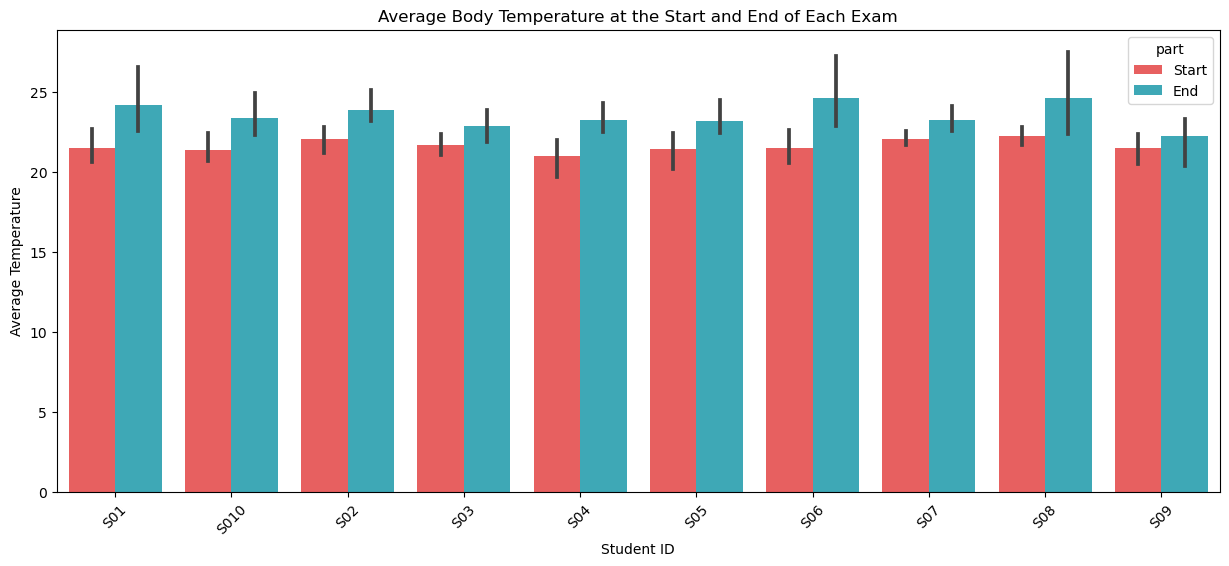

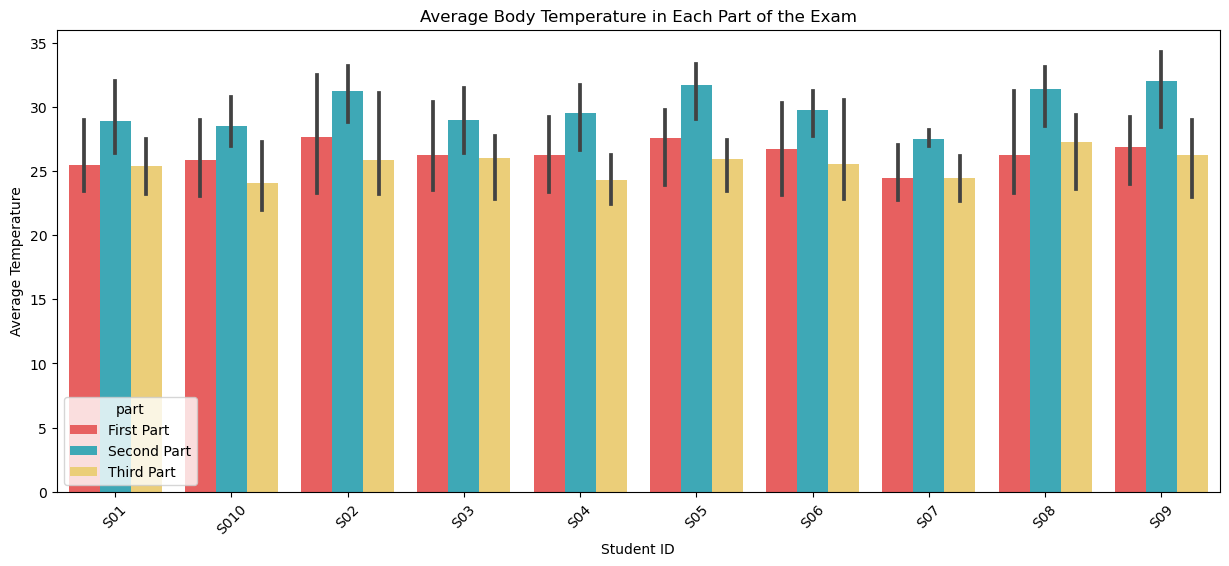

In [224]:
temp_df.columns = temp_df.columns.str.lower()

start_time_frame = 10  
end_time_frame = 10   

start_temp = temp_df[temp_df['time in mins'] <= start_time_frame].groupby(['student_id', 'exam'])['temp'].mean().reset_index()
start_temp['part'] = 'Start'

end_temp = temp_df[temp_df['time in mins'] > (temp_df.groupby(['student_id', 'exam'])['time in mins'].transform('max') - end_time_frame)]
end_temp = end_temp.groupby(['student_id', 'exam'])['temp'].mean().reset_index()
end_temp['part'] = 'End'

combined_temp_start_end = pd.concat([start_temp, end_temp])

plt.figure(figsize=(15, 6))
sns.barplot(x='student_id', y='temp', hue='part', data=combined_temp_start_end, palette=['#fe4a49', '#2ab7ca'])
plt.title('Average Body Temperature at the Start and End of Each Exam')
plt.xlabel('Student ID')
plt.ylabel('Average Temperature')
plt.xticks(rotation=45)
plt.show()

total_duration_per_exam = temp_df.groupby(['student_id', 'exam'])['time in mins'].max().reset_index()
total_duration_per_exam['first_part_end'] = total_duration_per_exam['time in mins'] / 3
total_duration_per_exam['second_part_end'] = 2 * total_duration_per_exam['time in mins'] / 3

merged_temp_data_parts = pd.merge(temp_df, total_duration_per_exam, on=['student_id', 'exam'])

first_part_temp = merged_temp_data_parts[merged_temp_data_parts['time in mins_x'] <= merged_temp_data_parts['first_part_end']]
first_part_avg_temp = first_part_temp.groupby(['student_id', 'exam'])['temp'].mean().reset_index()
first_part_avg_temp['part'] = 'First Part'

second_part_temp = merged_temp_data_parts[(merged_temp_data_parts['time in mins_x'] > merged_temp_data_parts['first_part_end']) & 
                                          (merged_temp_data_parts['time in mins_x'] <= merged_temp_data_parts['second_part_end'])]
second_part_avg_temp = second_part_temp.groupby(['student_id', 'exam'])['temp'].mean().reset_index()
second_part_avg_temp['part'] = 'Second Part'

third_part_temp = merged_temp_data_parts[merged_temp_data_parts['time in mins_x'] > merged_temp_data_parts['second_part_end']]
third_part_avg_temp = third_part_temp.groupby(['student_id', 'exam'])['temp'].mean().reset_index()
third_part_avg_temp['part'] = 'Third Part'

combined_temp_all_parts = pd.concat([first_part_avg_temp, second_part_avg_temp, third_part_avg_temp])

plt.figure(figsize=(15, 6))
sns.barplot(x='student_id', y='temp', hue='part', data=combined_temp_all_parts, palette=['#fe4a49', '#2ab7ca', '#fed766', '#e6e6ea', '#f4f4f8'])
plt.title('Average Body Temperature in Each Part of the Exam')
plt.xlabel('Student ID')
plt.ylabel('Average Temperature')
plt.xticks(rotation=45)
plt.show()


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fa4a49; border-radius: 100px 100px; text-align:left">15. What % of all students had a HR>80 and an HRV<30 in the second part of the finals? </h3>

In [267]:
xls = pd.ExcelFile(file_path)

hr_df = pd.read_excel(xls, sheet_name='HR')
ibi_df = pd.read_excel(xls, sheet_name='IBI')

hr_df.columns = hr_df.columns.str.lower()
ibi_df.columns = ibi_df.columns.str.lower()

# Function to calculate RMSSD (HRV)
def calculate_rmssd(ibi_values):
    diff = np.diff(ibi_values)
    squared_diff = np.square(diff)
    mean_squared_diff = np.mean(squared_diff)
    rmssd = np.sqrt(mean_squared_diff)*600
    return rmssd

total_duration_per_exam = temp_df.groupby(['student_id', 'exam'])['time in mins'].max().reset_index()
total_duration_per_exam['second_part_start'] = total_duration_per_exam['time in mins'] / 3
total_duration_per_exam['second_part_end'] = 2 * total_duration_per_exam['time in mins'] / 3

final_hr_data = pd.merge(hr_df, total_duration_per_exam, on=['student_id', 'exam'])
final_ibi_data = pd.merge(ibi_df, total_duration_per_exam, on=['student_id', 'exam'])

final_hr_second_part = final_hr_data[(final_hr_data['exam'].str.lower() == 'final') & 
                                    (final_hr_data['time in mins_x'] > final_hr_data['second_part_start']) & 
                                    (final_hr_data['time in mins_x'] <= final_hr_data['second_part_end'])]

final_ibi_second_part = final_ibi_data[(final_ibi_data['exam'].str.lower() == 'final') & 
                                      (final_ibi_data['time in mins_x'] > final_ibi_data['second_part_start']) & 
                                      (final_ibi_data['time in mins_x'] <= final_ibi_data['second_part_end'])]

mean_hr_final = final_hr_second_part.groupby('student_id')['hr'].mean().reset_index()
hrv_final = final_ibi_second_part.groupby('student_id')['ibi'].apply(calculate_rmssd).reset_index()
hrv_final.rename(columns={'ibi': 'rmssd'}, inplace=True)

final_hr_hrv = pd.merge(mean_hr_final, hrv_final, on='student_id')

criteria_count = final_hr_hrv[(final_hr_hrv['hr'] > 80) & (final_hr_hrv['rmssd'] < 30)].shape[0]

total_students_final = final_hr_hrv['student_id'].nunique()

percentage = (criteria_count / total_students_final) * 100

print(f"Percentage of students with HR > 80 and HRV < 30 in the second part of the finals: {percentage}%")


Percentage of students with HR > 80 and HRV < 30 in the second part of the finals: 0.0%


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fa4a49; border-radius: 100px 100px; text-align:left">16. What was the % difference between scores in both mid-terms vs the final</h3>

In [156]:
data = pd.read_excel(file_path)

data['Total Midterms'] = data['Midterm 1'] + data['Midterm 2']
data['% Difference'] = ((data['final'] - data['Total Midterms']) / data['Total Midterms']) * 100

average_percentage_difference = data['% Difference'].mean()

print(f"The average percentage difference between the scores in both mid-terms and the final is approximately {average_percentage_difference:.2f}%.")



The average percentage difference between the scores in both mid-terms and the final is approximately 6.81%.


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fa4a49; border-radius: 100px 100px; text-align:left">17. What % of all students are Asian?</h3>

In [157]:
asian_students_count = demography_df['Race'].value_counts().get('Asian', 0)
total_students_count = demography_df.shape[0]
percentage_asian_students = (asian_students_count / total_students_count) * 100

print(f"Percentage of Asian students: {percentage_asian_students:.2f}%")


Percentage of Asian students: 20.00%


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fa4a49; border-radius: 100px 100px; text-align:left">18. Display the full name of all students born in 2010</h3>

In [158]:
students_2010 = demography_df[demography_data['DOB'].dt.year == 2010].copy()

students_2010['Full Name'] = students_2010['First Name'] + ' ' + students_2010['Last Name']

full_names_2010 = students_2010['Full Name'].tolist()

full_names_2010_str = "\n".join(full_names_2010)
print("Full names of students born in 2010:\n" + full_names_2010_str)


Full names of students born in 2010:
Roger Frederick


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fa4a49; border-radius: 100px 100px; text-align:left">19. What was the average HR of the students who achieved the top 3 grades in mid-term 2</h3>

In [159]:
top_3_students_midterm_2 = grades_df.nlargest(3, 'Midterm 2')['Student_id']

top_3_hr_data = hr_df[hr_data['Student_id'].isin(top_3_students_midterm_2)]

average_hr_top_3 = top_3_hr_data.groupby('Student_id')['HR'].mean()

overall_average_hr_top_3 = average_hr_top_3.mean()

print(f"The average heart rate for the top 3 students in Midterm 2 is {overall_average_hr_top_3:.2f} bpm")


The average heart rate for the top 3 students in Midterm 2 is 107.69 bpm


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fa4a49; border-radius: 100px 100px; text-align:left">20. Use a bar chart to display the grades of every student in mid term 1</h3>

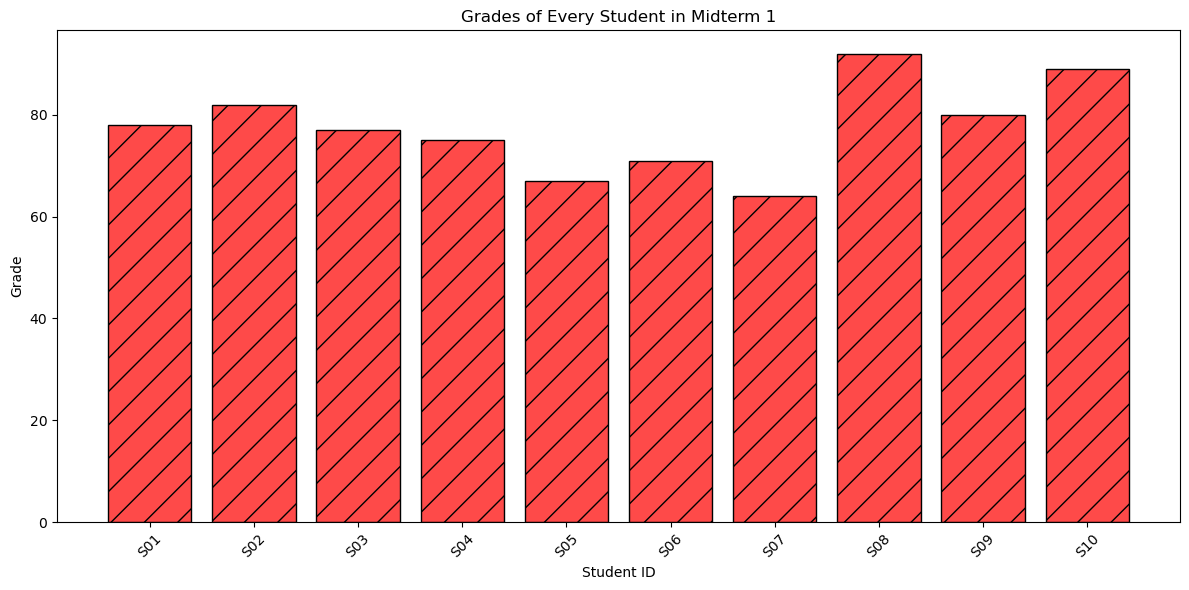

In [225]:
midterm1_grades = grades_data[['Student_id', 'Midterm 1']]

hatch_patterns = ['/'] 

plt.figure(figsize=(12, 6))
bars = plt.bar(midterm1_grades['Student_id'], midterm1_grades['Midterm 1'], color='#fe4a49', edgecolor='black')

for i, bar in enumerate(bars):
    bar.set_hatch(hatch_patterns[i % len(hatch_patterns)])

plt.xlabel('Student ID')
plt.ylabel('Grade')
plt.title('Grades of Every Student in Midterm 1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fa4a49; border-radius: 100px 100px; text-align:left">21. What % of all students are female?</h3>

In [161]:
total_students = demography_df.shape[0]

female_students = demography_df[demography_df['Gender'] == 'F'].shape[0]

percentage_female = (female_students / total_students) * 100

print(f"The percentage of female students among all students is: {percentage_female:.2f}%")


The percentage of female students among all students is: 50.00%


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fa4a49; border-radius: 100px 100px; text-align:left">22. Show the students for whom temperature fell below basal body temp of 36 degrees</h3>


In [162]:
def find_students_below_basal_temp(file_path, sheet_name='Temp', basal_temp=36.0):
    
    temp_data = pd.read_excel(file_path, sheet_name=sheet_name)

    below_basal_temp = temp_data[temp_data['TEMP'] < basal_temp]

    students_below_basal_temp = below_basal_temp['Student_id'].unique()

    return students_below_basal_temp

students_below_basal = find_students_below_basal_temp('/Users/mayaravi/Downloads/Exam Stress Final.xlsx')
print(students_below_basal)


['S01' 'S02' 'S03' 'S04' 'S05' 'S06' 'S07' 'S08' 'S09' 'S010']


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fa4a49; border-radius: 100px 100px; text-align:left">24. "Connect to sql and query the data in temp into a table of the same name</h3>


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fa4a49; border-radius: 100px 100px; text-align:left">24. Display a sunburst chart of count of students by Age, Gender and Race</h3>


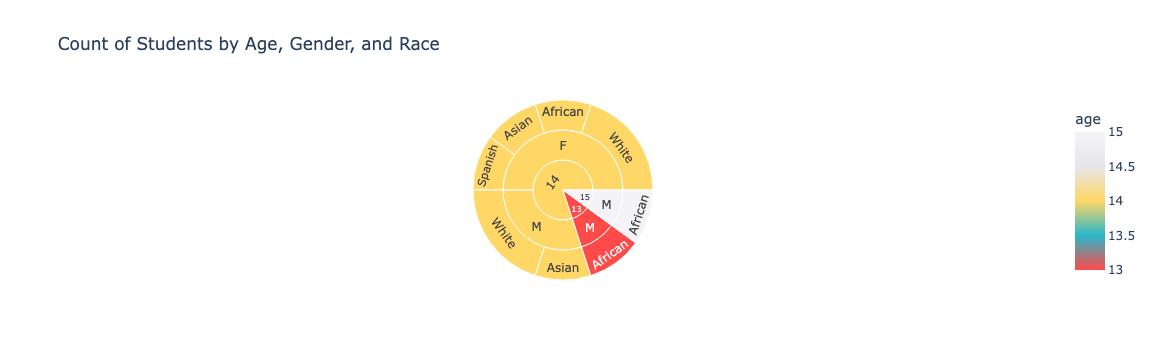

In [229]:
# Assuming demography_df is correctly loaded and has the columns 'DOB', 'Gender', 'Race'

current_year = datetime.now().year
demography_df['age'] = current_year - demography_df['dob'].dt.year

# Group the data by Age, Gender, and Race
grouped_data = demography_df.groupby(['age', 'gender', 'race']).size().reset_index(name='Count')

# Custom color scale
custom_color_scale = [
    (0.0, '#fe4a49'),  # Start with your first color
    (0.25, '#2ab7ca'), # Quarter way
    (0.5, '#fed766'),  # Half way
    (0.75, '#e6e6ea'), # Three quarters way
    (1.0, '#f4f4f8')   # End with your last color
]

fig = px.sunburst(
    grouped_data, 
    path=['age', 'gender', 'race'], 
    values='Count',
    color='age', 
    color_continuous_scale=custom_color_scale,  # Using custom color scale
    title='Count of Students by Age, Gender, and Race',
    custom_data=['Count']
)

fig.update_traces(hovertemplate='<b>%{label}</b><br>Count: %{customdata[0]}')

fig.show()


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fa4a49; border-radius: 100px 100px; text-align:left">25. Create a visualization on the count of Students with an HRV 10 or more points lower than ideal HRV.
"</h3>


Exam
final        3
midterm 1    4
midterm 2    5
Name: Student_id, dtype: int64


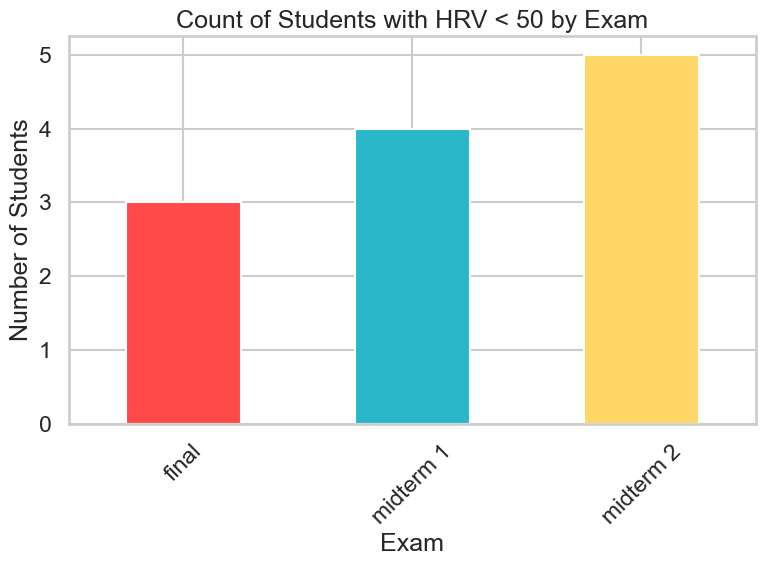

In [269]:
# ideal hrv is 60 
students_below_50_hrv = ibi_30_min_rmssd[ibi_30_min_rmssd['HRV'] < 50]

counts_per_exam_below_50_hrv = students_below_50_hrv.groupby('Exam')['Student_id'].nunique()

print(counts_per_exam_below_50_hrv)

exam_colors = ['#fe4a49', '#2ab7ca', '#fed766']
plt.figure(figsize=(8, 6))
counts_per_exam_below_50_hrv.plot(kind='bar', color=exam_colors)
plt.title('Count of Students with HRV < 50 by Exam')
plt.xlabel('Exam')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fa4a49; border-radius: 100px 100px; text-align:left">26. Plot a graph to show the distribution of score in the final exam by gender </h3>


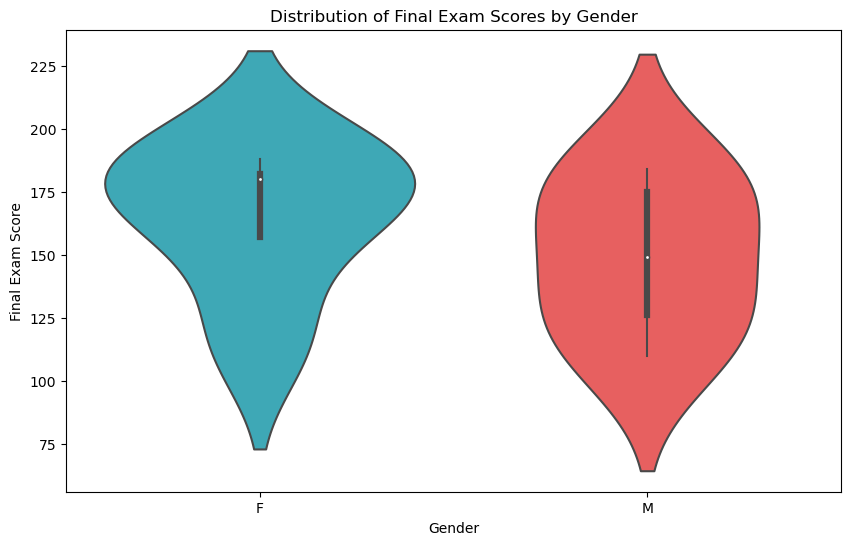

In [237]:
main_data = pd.read_excel(file_path)

demography_data = pd.read_excel(file_path, 'Demography')

merged_data = pd.merge(main_data, demography_data[['Student_id', 'Gender']], on='Student_id')
custom_colors = {"M": "#fe4a49", "F": "#2ab7ca"}
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='final', data=merged_data, palette=custom_colors)

plt.title('Distribution of Final Exam Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Final Exam Score')
plt.show()



<p style="color: navy;">
    The violin plot visually represents the distribution of final exam scores by gender.
    <ul>
        <li>The width of each violin indicates the density of scores at different levels.</li>
        <li>The thinner sections represent a lower density of scores, while wider sections indicate a higher density.</li>
        <li>This plot can reveal the central tendency, spread, and skewness of the scores for each gender.</li>
        <li>It can also show potential outliers and the overall shape of the score distribution.</li>
    </ul>
</p>


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fa4a49; border-radius: 100px 100px; text-align:left">27. Which demographic has the lowest average of scores in all 3 exams</h3>


In [165]:

main_data = pd.read_excel(file_path)

current_year = datetime.now().year
demography_df['Age'] = current_year - demography_df['DOB'].dt.year

full_data = pd.merge(main_data, demography_df[['Student_id', 'Age', 'Gender', 'Race']], on='Student_id')

exam_columns = ['Midterm 1', 'Midterm 2', 'final']
full_data[exam_columns] = full_data[exam_columns].apply(pd.to_numeric, errors='coerce')

full_data['Average_Score'] = full_data[exam_columns].mean(axis=1)

average_scores_by_demographic = full_data.groupby(['Age', 'Gender', 'Race'])['Average_Score'].mean()

lowest_avg_demographic = average_scores_by_demographic.idxmin()

students_lowest_demographic = full_data[(full_data['Age'] == lowest_avg_demographic[0]) & 
                                        (full_data['Gender'] == lowest_avg_demographic[1]) & 
                                        (full_data['Race'] == lowest_avg_demographic[2])]

full_details_lowest_demographic = demography_df[demography_data['Student_id'].isin(students_lowest_demographic['Student_id'])]

for index, row in full_details_lowest_demographic.iterrows():
    print(f"Name: {row['First Name']} {row['Last Name']}, Age: {row['Age']}, Gender: {row['Gender']}, Race: {row['Race']}")


Name: Roger Frederick, Age: 13, Gender: M, Race: African


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fa4a49; border-radius: 100px 100px; text-align:left">28. Delete the column age from question 12, using an iterative loop</h3>


In [69]:
for column in modified_demography_df.columns:
    if column == 'Age':
        modified_demography_df.drop(column, axis=1, inplace=True)
        break

print(modified_demography_df)


  Student_id First Name  Last Name Gender     Race
0        S01    Barbara    Walters      F    White
1        S02       Nora      Jones      F    White
2        S03    Gabriel    Willows      F    Asian
3        S04       John        Doe      M    Asian
4        S05       Jane        Doe      F  African
5        S06        Pat     Murray      M  African
6        S07      Roger  Frederick      M  African
7        S08       John      Wills      M    White
8        S09       Paul    Cartney      M    White
9        S10     Janice      Smith      F  Spanish


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fa4a49; border-radius: 100px 100px; text-align:left">29. Create a heat map of HRV, temp and scores. To show the correlation beween these variables</h3>


In [286]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/Users/mayaravi/Downloads/Exam Stress Final.xlsx'
grades_df = pd.read_excel(file_path, 'Grades')
temp_df = pd.read_excel(file_path, 'Temp')
ibi_df = pd.read_excel(file_path, 'IBI')

def standardize_dataframe(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    if 'student_id' in df.columns:
        df['student_id'] = df['student_id'].str.upper().str.zfill(4)
    return df

grades_df = standardize_dataframe(grades_df)
temp_df = standardize_dataframe(temp_df)
ibi_df = standardize_dataframe(ibi_df)

def calculate_rmssd(ibi_values):
    diff = np.diff(ibi_values)
    squared_diff = np.square(diff)
    mean_squared_diff = np.mean(squared_diff)
    rmssd = np.sqrt(mean_squared_diff)
    return rmssd

ibi_30_min = ibi_df[ibi_df['time_in_mins'] < 30]
ibi_30_min_grouped = ibi_30_min.groupby('student_id')['ibi'].apply(lambda x: calculate_rmssd(x.values)).reset_index()
ibi_30_min_grouped.rename(columns={'ibi': 'rmssd'}, inplace=True)
ibi_30_min_grouped['hrv'] = pd.to_numeric(ibi_30_min_grouped['rmssd'] * 600, errors='coerce')

grades_df['average_score'] = grades_df[['midterm_1', 'midterm_2', 'final']].mean(axis=1)
grades_df['average_score'] = pd.to_numeric(grades_df['average_score'], errors='coerce')

correlation_data = pd.merge(grades_df[['student_id', 'average_score']], ibi_30_min_grouped[['student_id', 'hrv']], on='student_id')
correlation_data = pd.merge(correlation_data, temp_df[['student_id', 'temp']], on='student_id')
correlation_data.dropna(inplace=True)

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Average Score, HRV, and Temperature Correlation")
plt.show()


ValueError: could not convert string to float: '0S01'

<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fa4a49; border-radius: 100px 100px; text-align:left">30. Use the dataset given and Enumerate in Python with any example.</h3>


In [166]:
# Iterate over the rows of the demography data using enumerate
for index, row in enumerate(demography_df.itertuples(), start=1):
    print(f"Student {index}: ID = {row.Student_id}, Gender = {row.Gender}, Race = {row.Race}")


Student 1: ID = S01, Gender = F, Race = White
Student 2: ID = S02, Gender = F, Race = White
Student 3: ID = S03, Gender = F, Race = Asian
Student 4: ID = S04, Gender = M, Race = Asian
Student 5: ID = S05, Gender = F, Race = African
Student 6: ID = S06, Gender = M, Race = African
Student 7: ID = S07, Gender = M, Race = African
Student 8: ID = S08, Gender = M, Race = White
Student 9: ID = S09, Gender = M, Race = White
Student 10: ID = S10, Gender = F, Race = Spanish


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #d12f6b; border-radius: 100px 100px; text-align:left">31. Create a jointplot on EDA & Grades.</h3>


<Figure size 1000x600 with 0 Axes>

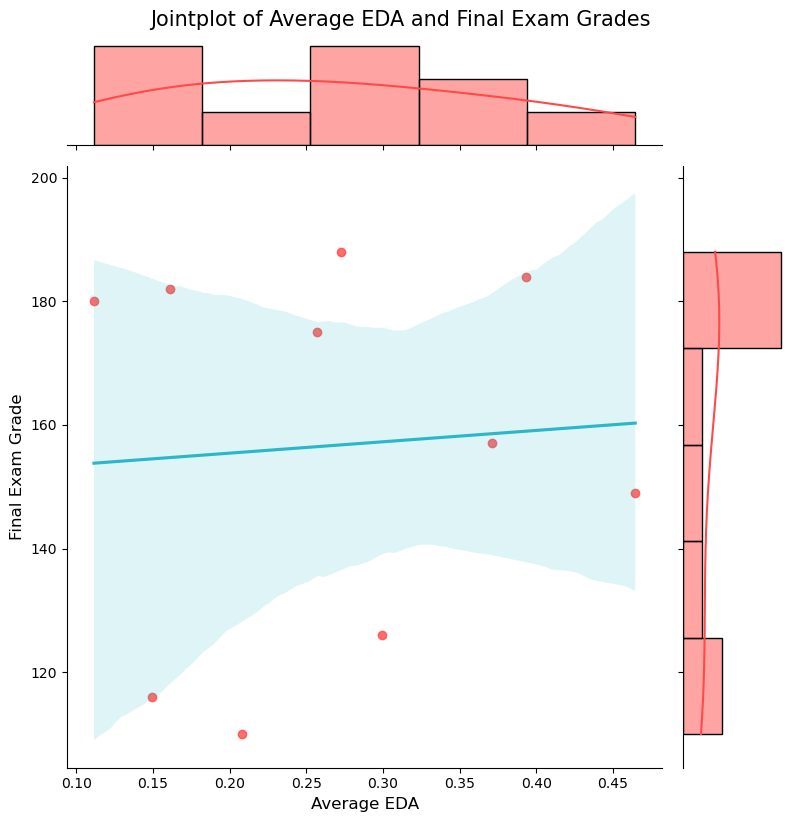

In [238]:
eda_df.columns = eda_df.columns.str.lower()
grades_df.columns = grades_df.columns.str.lower()

eda_df['student_id'] = eda_df['student_id'].str.replace('S010', 'S10', regex=False)

eda_agg_df = eda_df.groupby('student_id').agg({'eda': 'mean'}).reset_index()

merged_df = pd.merge(eda_agg_df, grades_df[['student_id', 'final']], on='student_id')

plt.figure(figsize=(10, 6))
jointplot = sns.jointplot(data=merged_df, x='eda', y='final', kind="reg", height=8, 
                          color='#fe4a49', line_kws={'color': '#2ab7ca'})

jointplot.set_axis_labels('Average EDA', 'Final Exam Grade', fontsize=12)
plt.suptitle('Jointplot of Average EDA and Final Exam Grades', fontsize=15, y=1.02)
plt.show()



<p style="color: navy;">
    <strong>Insights from the Jointplot:</strong>
    <br><br>
    The jointplot provides a visual representation of the relationship between average EDA (a measure potentially related to stress or arousal levels) and final exam grades.
    <ul>
        <li>The scatterplot helps in identifying any patterns or clusters in the data.</li>
        <li>The regression line offers an initial indication of the nature of the relationship (positive, negative, or no clear trend) between EDA and exam grades.</li>
        <li>The marginal histograms show the distribution of each variable, giving a sense of the range and common values for EDA and exam grades.</li>
    </ul>
</p>


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">32. Use indexing , loc to retrieve the row with maximum HR
</h3>


In [168]:
max_hr_index = hr_df['HR'].idxmax()

row_with_max_hr = hr_data.loc[max_hr_index]

print(row_with_max_hr)


HR                199.278
Time in mins         41.0
Student_id            S04
Exam            Midterm 1
Name: 2720, dtype: object


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">33. Make a pivot table where Student IDs are the columns and EDA, HR and temp values are the rows
</h3>


In [171]:
eda_data = pd.read_excel(file_path, sheet_name='EDA')
hr_data = pd.read_excel(file_path, sheet_name='HR')
temp_data = pd.read_excel(file_path, sheet_name='Temp')

combined_data = pd.concat([
    eda_data[['Student_id', 'EDA']].rename(columns={'EDA': 'Value'}).assign(Metric='EDA'),
    hr_data[['Student_id', 'HR']].rename(columns={'HR': 'Value'}).assign(Metric='HR'),
    temp_data[['Student_id', 'TEMP']].rename(columns={'TEMP': 'Value'}).assign(Metric='Temp')
])

pivot_table = combined_data.pivot_table(index='Metric', columns='Student_id', values='Value')

print(pivot_table)


Student_id         S01        S010         S02         S03        S04  \
Metric                                                                  
EDA           0.161171    0.149369    0.111534    0.272532   0.464468   
HR          106.522138  106.231091  114.313813  103.283502  98.399456   
Temp         26.475624   26.187834   28.224066   26.899314  26.826271   

Student_id         S05         S06         S07         S08        S09  
Metric                                                                 
EDA           0.370783    0.256905    0.208034    0.393437   0.299416  
HR          104.806015  104.793488  103.842102  105.475896  98.802752  
Temp         28.553185   27.228459   25.569712   28.464253  28.453486  


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">34. Display the Student Demographics and Grades who are born in leap Year</h3>


In [173]:
main_data = pd.read_excel(file_path)

def is_leap_year(year):
    return year % 4 == 0 and (year % 100 != 0 or year % 400 == 0)

demography_df['Year_of_Birth'] = demography_df['DOB'].dt.year

leap_year_students = demography_data[demography_df['Year_of_Birth'].apply(is_leap_year)]

leap_year_students_with_grades = pd.merge(leap_year_students, main_data, on='Student_id')

print(leap_year_students_with_grades.head())


  Student_id        DOB First Name Last Name Gender     Race  Midterm 1  \
0        S06 2008-04-04        Pat    Murray      M  African         71   

   Midterm 2  final  
0         64    175  


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">35. Create a Bins of Grades to segregate the students in Grades  'A','B',C'</h3>


In [74]:
main_data['Normalized Final'] = main_data['final'] / 2
bins = [0, 65, 80, 100]  # Adjust these ranges as needed
labels = ['C', 'B', 'A']

main_data['Midterm 1 Grade'] = pd.cut(main_data['Midterm 1'], bins=bins, labels=labels)
main_data['Midterm 2 Grade'] = pd.cut(main_data['Midterm 2'], bins=bins, labels=labels)
main_data['Final Grade'] = pd.cut(main_data['Normalized Final'], bins=bins, labels=labels)

print(main_data[['Student_id', 'Midterm 1 Grade', 'Midterm 2 Grade', 'Final Grade']])


  Student_id Midterm 1 Grade Midterm 2 Grade Final Grade
0        S01               B               A           A
1        S02               A               A           A
2        S03               B               A           A
3        S04               B               B           B
4        S05               B               B           B
5        S06               B               C           A
6        S07               C               C           C
7        S08               A               A           A
8        S09               B               C           C
9        S10               A               C           C


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">36. Create a Word Cloud with First name of Student Names based on thier Race </h3>


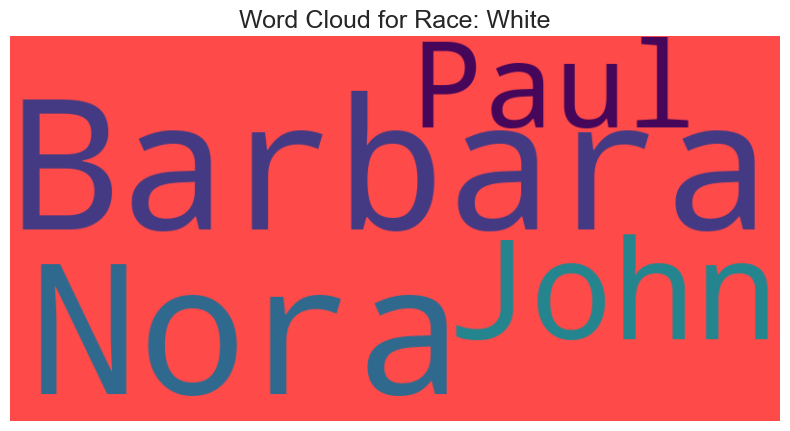

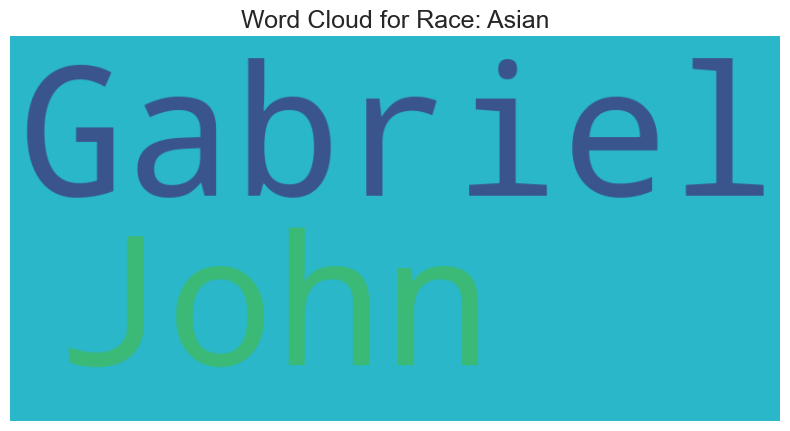

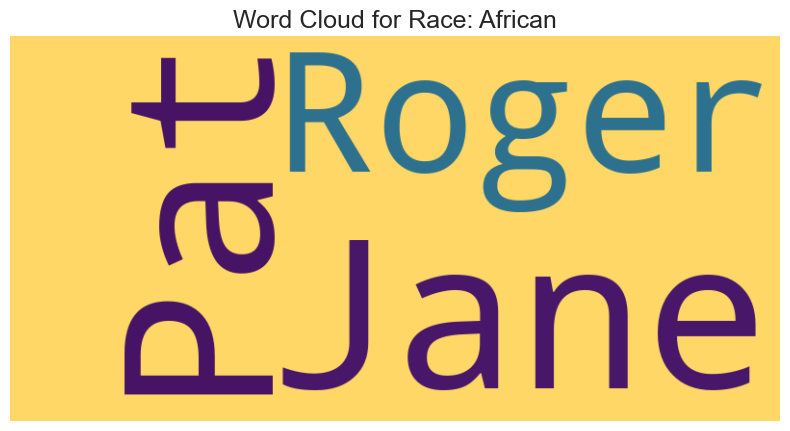

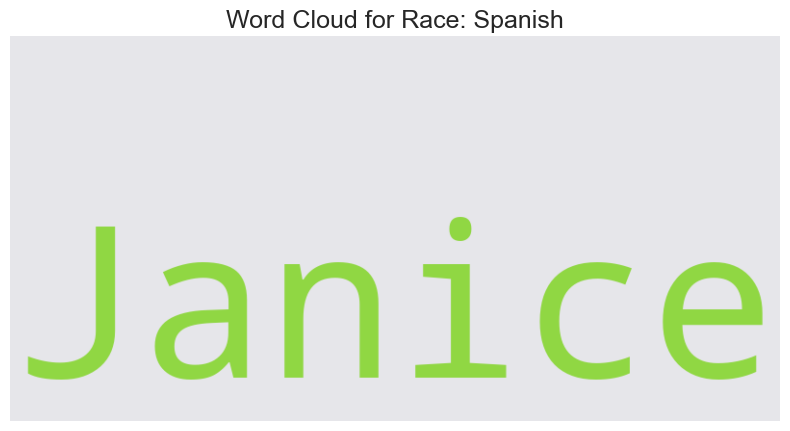

In [254]:
def generate_word_clouds_by_race(data):
    races = data['Race'].unique()
    colors = ['#fe4a49', '#2ab7ca', '#fed766', '#e6e6ea', '#f4f4f8']  # Your color palette

    for i, race in enumerate(races):
        race_data = data[data['Race'] == race]
        text = ' '.join(name for name in race_data['First Name'])

        # Select background color from palette, cycling through if there are more races than colors
        bg_color = colors[i % len(colors)]

        wordcloud = WordCloud(width=800, height=400, background_color=bg_color).generate(text)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Word Cloud for Race: {race}")
        plt.show()

# Example usage: Generate word clouds for each race
generate_word_clouds_by_race(demography_data)


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">37. Display the student Names and respective grades who has Maximum heart rate</h3>


In [175]:
hr_df.columns = hr_df.columns.str.lower()
demography_df.columns = demography_df.columns.str.lower()
grades_df.columns = grades_df.columns.str.lower()

max_hr_df = hr_df.groupby('student_id').agg({'hr': 'max'}).reset_index()
max_hr_value = max_hr_df['hr'].max()
students_with_max_hr = max_hr_df[max_hr_df['hr'] == max_hr_value]['student_id']

student_max_hr_info = demography_df[demography_df['student_id'].isin(students_with_max_hr)]

student_max_hr_grades = pd.merge(student_max_hr_info, grades_df, on='student_id')

student_max_hr_grades_display = student_max_hr_grades[['first name', 'last name', 'midterm 1', 'midterm 2', 'final']]

print("Maximum Heart Rate:", max_hr_value)
print("Student Information with Maximum Heart Rate:")
print(student_max_hr_grades_display)


Maximum Heart Rate: 199.278
Student Information with Maximum Heart Rate:
  first name last name  midterm 1  midterm 2  final
0       John       Doe         75         77    149


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">38. Write a Python program to get the number of occurrences of a specified element in the array.</h3>


In [91]:
def count_occurrences(arr, element):
    return arr.count(element)
array = [1, 4, 2, 4, 5, 4, 9]
element_to_count = 4
print(f"The number of occurrences of {element_to_count} is: {count_occurrences(array, element_to_count)}")


The number of occurrences of 4 is: 3


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">39. Create a 3D list using nested for loops</h3>


In [92]:
x_dim, y_dim, z_dim = 3, 4, 5  

three_d_list = [[[x + y + z for z in range(z_dim)] for y in range(y_dim)] for x in range(x_dim)]

print(three_d_list)


[[[0, 1, 2, 3, 4], [1, 2, 3, 4, 5], [2, 3, 4, 5, 6], [3, 4, 5, 6, 7]], [[1, 2, 3, 4, 5], [2, 3, 4, 5, 6], [3, 4, 5, 6, 7], [4, 5, 6, 7, 8]], [[2, 3, 4, 5, 6], [3, 4, 5, 6, 7], [4, 5, 6, 7, 8], [5, 6, 7, 8, 9]]]


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">40. Array = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]
Display each row of this array as a separate slice</h3>


In [93]:
array = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

for row in array:
    print(row)


[1, 2, 3]
[4, 5, 6]
[7, 8, 9]


<h3 style="font-family:garamond; font-size:20px; background-color: white; color:#fe4a49; border-radius: 100px 100px; text-align:left">41. Find the Student name and the Exam who has the Temprature '36.042'</h3>


In [180]:
temp_data = pd.read_excel(file_path, sheet_name='Temp')
demography_data = pd.read_excel(file_path, sheet_name='Demography')

specific_temp = 36.042
students_with_specific_temp = temp_data[temp_data['TEMP'] == specific_temp]

students_temp_info = pd.merge(students_with_specific_temp, demography_data[['Student_id', 'First Name', 'Last Name']], on='Student_id')

print(students_temp_info[['First Name', 'Last Name', 'Exam']])


  First Name Last Name   Exam
0       Nora     Jones  final


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">42. Using arrays and loops, find the count of students based on gender</h3>


In [76]:
student_genders = ['F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M']  

gender_counts = {}

for gender in student_genders:
    if gender in gender_counts:
        gender_counts[gender] += 1
    else:
        gender_counts[gender] = 1
print("Gender Counts:", gender_counts)


Gender Counts: {'F': 5, 'M': 5}


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">43. Generate Unique Student ID  using Lamda Function.</h3>


In [77]:
num_students = 10

generate_id = lambda num: f"S{num:02d}"

student_ids = [generate_id(i) for i in range(1, num_students + 1)]

print(student_ids)


['S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08', 'S09', 'S10']


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">44. Create a Box  plot for HR and Temp</h3>


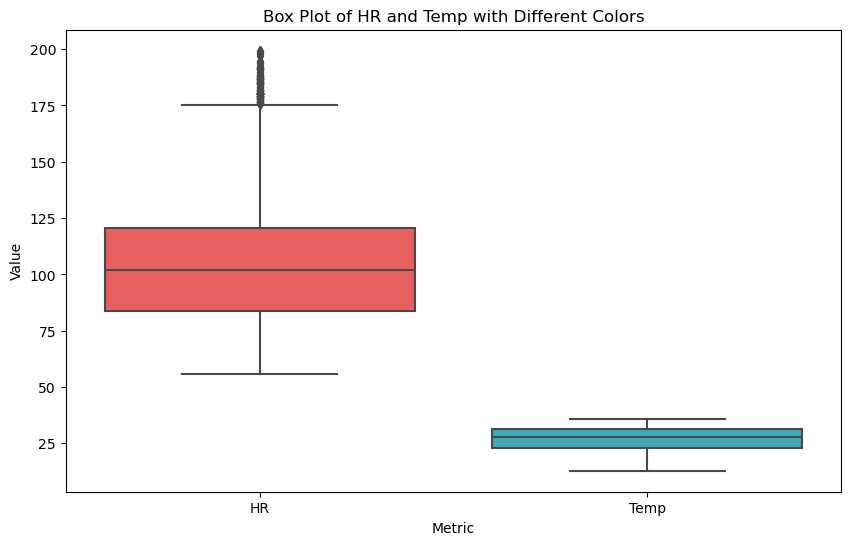

In [241]:
combined_data_box = pd.concat([
    hr_data[['HR']].rename(columns={'HR': 'Value'}).assign(Metric='HR'),
    temp_data[['TEMP']].rename(columns={'TEMP': 'Value'}).assign(Metric='Temp')
])

palette = {"HR": "#fe4a49", "Temp": "#2ab7ca"}

plt.figure(figsize=(10, 6))
sns.boxplot(x='Metric', y='Value', data=combined_data_box, palette=palette)

plt.title('Box Plot of HR and Temp with Different Colors')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()

<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">45. Find the student's Max mean EDA who are attending Final </h3>


In [183]:
eda_data = pd.read_excel('/Users/mayaravi/Downloads/Exam Stress Final.xlsx', sheet_name='EDA')

final_exam_eda = eda_data[eda_data['Exam'] == 'final']

max_mean_eda = final_exam_eda.groupby('Student_id')['EDA'].mean().max()

students_with_max_mean_eda = final_exam_eda.groupby('Student_id')['EDA'].mean().reset_index()
students_with_max_eda = students_with_max_mean_eda[students_with_max_mean_eda['EDA'] == max_mean_eda]

print(students_with_max_eda)


  Student_id       EDA
5        S05  0.542409


<h3 style="font-family:garamond; font-size:20px; background-color: white; color:#fe4a49; border-radius: 100px 100px; text-align:left">46. Find the Grade of a Student whose Name ends with 'S'</h3>


In [185]:
demography_df.columns = demography_df.columns.str.lower()
grades_df.columns = grades_df.columns.str.lower()

students_with_s = demography_df[(demography_df['first name'].str.endswith('S')) | 
                                (demography_df['last name'].str.endswith('S'))]

students_with_s_grades = pd.merge(students_with_s, grades_df, left_on='student_id', right_on='student_id')

students_with_s_grades_display = students_with_s_grades[['first name', 'last name', 'midterm 1', 'midterm 2', 'final']]

# Printing the result
print(students_with_s_grades_display)


Empty DataFrame
Columns: [first name, last name, midterm 1, midterm 2, final]
Index: []


None of the students first and last name ends with S

<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">47. Plot Temp analysis of all students during 1 hr of the exam (x axis time and y axis Temp)</h3>


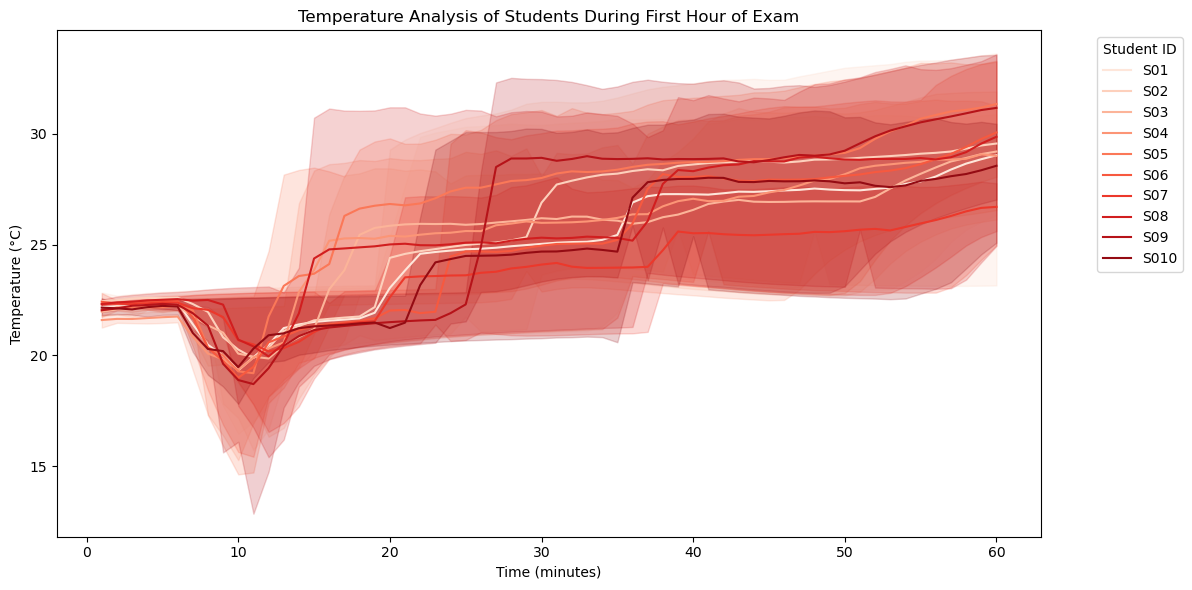

In [246]:


temp_first_hour = temp_data[temp_data['Time in mins'] <= 60]

# Create a custom red to brown palette
red_brown_palette = sns.color_palette("Reds", n_colors=10)  # You can adjust 'n_colors' based on the number of unique student IDs

plt.figure(figsize=(12, 6))
sns.lineplot(x='Time in mins', y='TEMP', data=temp_first_hour, hue='Student_id', palette=red_brown_palette)

plt.title('Temperature Analysis of Students During First Hour of Exam')
plt.xlabel('Time (minutes)')
plt.ylabel('Temperature (°C)')
plt.legend(title='Student ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  
plt.show()


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">48. Find the Full Name of the student who has Max HR </h3>


In [188]:
hr_data = pd.read_excel(file_path, sheet_name='HR')
demography_data = pd.read_excel(file_path, sheet_name='Demography')

max_hr_value = hr_data['HR'].max()

student_with_max_hr = hr_data[hr_data['HR'] == max_hr_value]

student_with_max_hr_full_name = pd.merge(student_with_max_hr, demography_data[['Student_id', 'First Name', 'Last Name']], on='Student_id')

student_with_max_hr_full_name['Full Name'] = student_with_max_hr_full_name['First Name'] + " " + student_with_max_hr_full_name['Last Name']

print(student_with_max_hr_full_name[['Full Name']])


  Full Name
0  John Doe


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">49. "[    "Python Hackthaon.",
    "December 2023.",
    "Numpy Ninja."  ]
 tokenise the Sentences  and place it in single column"</h3>


In [104]:
sentences = [
    "Python Hackathon.",
    "December 2023.",
    "Numpy Ninja."
]

tokens = [word for sentence in sentences for word in sentence.split()]

df_tokens = pd.DataFrame(tokens, columns=['Tokens'])

print(df_tokens)


       Tokens
0      Python
1  Hackathon.
2    December
3       2023.
4       Numpy
5      Ninja.


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">50. Count the Students who are in the Race Group 'White' </h3>


In [105]:
demography_data = pd.read_excel(file_path, sheet_name='Demography')

white_students_count = demography_data['Race'].value_counts().get('White', 0)

print("Number of students in the 'White' race group:", white_students_count)


Number of students in the 'White' race group: 4


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">51. Display the Youngest Student demographic details. with Avg Heart Rate</h3>


In [189]:
hr_df.columns = hr_df.columns.str.lower()
hr_df['student_id'] = hr_df['student_id'].str.replace('S010', 'S10', regex=False)

demography_df = pd.read_excel(xls, sheet_name='Demography')
demography_df.columns = demography_df.columns.str.lower()
demography_df['dob'] = pd.to_datetime(demography_df['dob'])  # Ensure the DOB column is in datetime format
youngest_student_info = demography_df[demography_df['dob'] == demography_df['dob'].max()]

avg_hr_df = hr_df.groupby('student_id').agg({'hr': 'mean'}).reset_index()

youngest_student_hr = pd.merge(youngest_student_info, avg_hr_df, on='student_id')

print(youngest_student_hr)



  student_id        dob first name  last name gender     race          hr
0        S07 2010-08-01      Roger  Frederick      M  African  103.842102


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">52. Plot the Donut chart Student distrubution by Gender </h3>


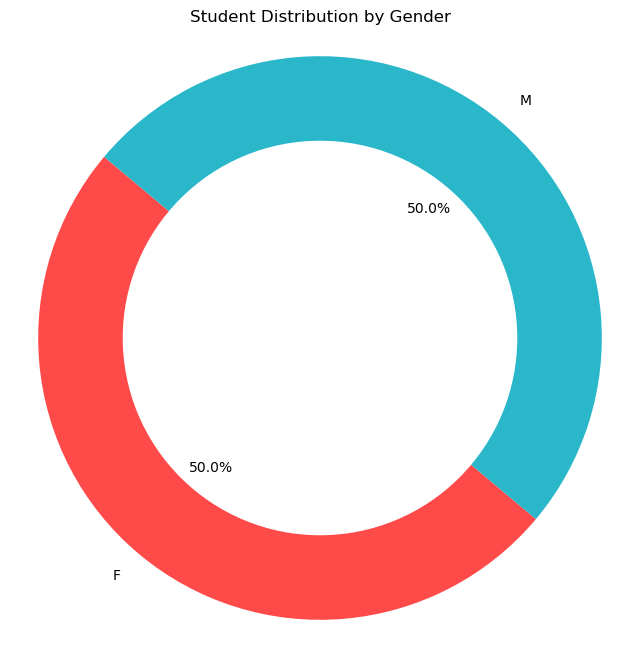

In [191]:
gender_counts = demography_df['gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(circle)

plt.title('Student Distribution by Gender')

plt.axis('equal') 
plt.show()


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">53. Calculate the 'AGE' of the Student and Display with Student Name  </h3>


In [193]:
demography_data = pd.read_excel(file_path, sheet_name='Demography')

demography_data['DOB'] = pd.to_datetime(demography_data['DOB'])

current_date = pd.to_datetime('2023-12-06')  

def calculate_age(dob):
    age = relativedelta(current_date, dob)
    return age.years

demography_data['Age'] = demography_data['DOB'].apply(calculate_age)

student_age_df = demography_data[['First Name', 'Last Name', 'Age']]
print(student_age_df)


  First Name  Last Name  Age
0    Barbara    Walters   14
1       Nora      Jones   14
2    Gabriel    Willows   14
3       John        Doe   14
4       Jane        Doe   14
5        Pat     Murray   15
6      Roger  Frederick   13
7       John      Wills   14
8       Paul    Cartney   14
9     Janice      Smith   14


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">54. np.arange(1,31).reshape(6,5),find array slicing to get the elements 4,5,24,25,29,30. </h3>


In [121]:
arr = np.arange(1, 31).reshape(6, 5)

result = arr[1:3, 0:2]  # Rows 1 and 2, Columns 0 and 1

result = result.flatten()

print(result)


[ 6  7 11 12]


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">55. Display the mean Heart Rate who scored Least Grade in Final </h3>


In [196]:
lowest_grade_student = grades_df[grades_df['final'] == grades_df['final'].min()]['student_id']

mean_hr_df = hr_df.groupby('student_id').agg({'hr': 'mean'}).reset_index()

lowest_grade_student_hr = pd.merge(lowest_grade_student, mean_hr_df, on='student_id')

print(lowest_grade_student_hr)


  student_id          hr
0        S07  103.842102


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">56. Input the Lastname of the Student and Based on the gender concatinate 'MR' or 'MS' to the Full Name</h3>


In [201]:
demography_data = pd.read_excel(file_path, sheet_name='Demography')

last_name_input = input("Enter the last name of the student: ")

gender = demography_data.loc[demography_data['Last Name'] == last_name_input, 'Gender'].values[0] if last_name_input in demography_data['Last Name'].values else None

if gender is not None:

    title = 'MR' if gender == 'M' else 'MS'

    full_name = demography_data.loc[demography_data['Last Name'] == last_name_input, 'First Name'].values[0] + ' ' + last_name_input

    result = title + ' ' + full_name

    # Print the result
    print("Title and Full Name:", result)
else:
    print("Last name not found in the dataset.")


Enter the last name of the student:  Walters


Title and Full Name: MS Barbara Walters


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">57. Give Distrubution chart of MAX EDA of the midterm1</h3>


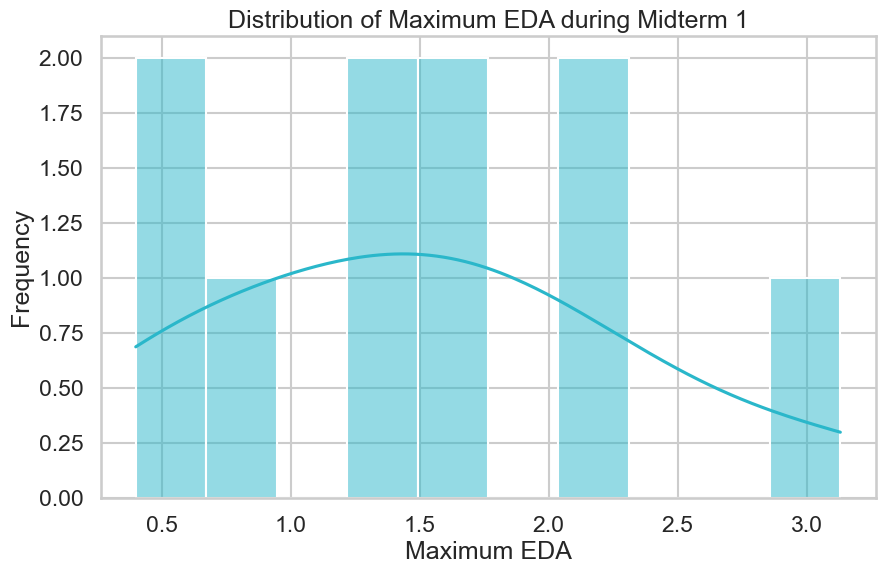

In [257]:
eda_df.columns = eda_df.columns.str.lower()  # Consistency in column names
eda_df['student_id'] = eda_df['student_id'].str.replace('S010', 'S10', regex=False)  # Resolving student ID discrepancy

midterm1_eda = eda_df[eda_df['exam'].str.lower() == 'midterm 1']

max_eda_midterm1 = midterm1_eda.groupby('student_id').agg({'eda': 'max'}).reset_index()

plt.figure(figsize=(10, 6))
sns.histplot(max_eda_midterm1['eda'], kde=True, bins=10, color='#2ab7ca')
plt.title('Distribution of Maximum EDA during Midterm 1')
plt.xlabel('Maximum EDA')
plt.ylabel('Frequency')
plt.show()

<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">58. Count the students based on Genderwise using count plot</h3>


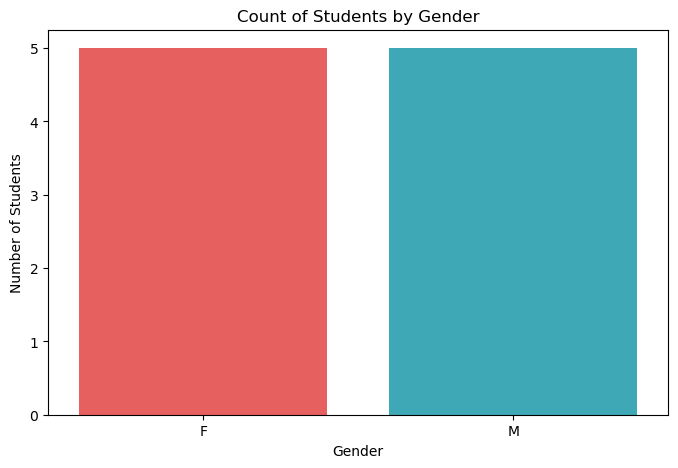

In [248]:
custom_palette = ['#fe4a49', '#2ab7ca']

plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=demography_df, palette=custom_palette) 
plt.title('Count of Students by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.show()

<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">59. Display full name of Student who are born in year '2010'</h3>

In [205]:
demography_data = pd.read_excel(file_path, sheet_name='Demography')

students_2010 = demography_data[demography_data['DOB'].dt.year == 2010]

students_2010 = students_2010.copy()
students_2010['Full Name'] = students_2010['First Name'] + " " + students_2010['Last Name']

students_2010_full_names = students_2010['Full Name']
print(students_2010_full_names)


6    Roger Frederick
Name: Full Name, dtype: object


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">60. "       [ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25],
       [26, 27, 28, 29, 30]  In the Array,find array slicing for elements 2,8,14,20."</h3>

In [85]:
import numpy as np

array = np.array([[ 1,  2,  3,  4,  5],
                  [ 6,  7,  8,  9, 10],
                  [11, 12, 13, 14, 15],
                  [16, 17, 18, 19, 20],
                  [21, 22, 23, 24, 25],
                  [26, 27, 28, 29, 30]])

selected_elements = array[[0, 1, 2, 3], [1, 2, 3, 4]]

print(selected_elements)


[ 2  8 14 20]


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">61. Create a dataframe with Max EDA and Mean HR as the indices and the count of number of records per student as the value.</h3>

In [206]:
eda_data = pd.read_excel(file_path, sheet_name='EDA')

hr_data = pd.read_excel(file_path, sheet_name='HR')

max_eda_per_student = eda_data.groupby('Student_id')['EDA'].max()

mean_hr_per_student = hr_data.groupby('Student_id')['HR'].mean()

combined_data = pd.merge(max_eda_per_student, mean_hr_per_student, on='Student_id', how='inner')

combined_data['Record_Count'] = 1

final_df = combined_data.reset_index()  # Resetting index to include Student_id as a column

print(final_df)


  Student_id    EDA          HR  Record_Count
0        S01  2.198  106.522138             1
1       S010  1.423  106.231091             1
2        S02  1.311  114.313813             1
3        S03  1.651  103.283502             1
4        S04  5.795   98.399456             1
5        S05  1.611  104.806015             1
6        S06  2.184  104.793488             1
7        S07  1.485  103.842102             1
8        S08  2.920  105.475896             1
9        S09  2.756   98.802752             1


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">62. "Print the Last name like below ouptput eg:.Last Name and count of Last Name   Occurance  :
 Counter({'Doe': 2, 'Walters': 1, 'Jones': 1, 'Willows': 1, 'Murray': 1, 'Frederick': 1, 'Wills': 1, 'Cartney': 1, 'Smith': 1})"</h3>

In [207]:
demography_data = pd.read_excel(file_path, sheet_name='Demography')

last_name_counts = Counter(demography_data['Last Name'])

print("Last Name and count of Last Name Occurrence:", last_name_counts)


Last Name and count of Last Name Occurrence: Counter({'Doe': 2, 'Walters': 1, 'Jones': 1, 'Willows': 1, 'Murray': 1, 'Frederick': 1, 'Wills': 1, 'Cartney': 1, 'Smith': 1})


<h3 style="font-family:garamond; font-size:20px; background-color: white; color:#fe4a49; border-radius: 100px 100px; text-align:left">63. Retrieve the row with minimum EDA using sorting technique.</h3>

In [208]:
eda_data = pd.read_excel(file_path, sheet_name='EDA')

row_with_min_eda = eda_data.sort_values(by='EDA', ascending=True).head(1)

print(row_with_min_eda)


      EDA  Time in mins Student_id       Exam
4499  0.0           166        S06  midterm 2


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">64. get the last letter of last name of students using RegEX </h3>

In [209]:
def get_last_letter(name):
    match = re.search(r'(\w)$', name)  # \w matches any word character; $ denotes the end of the string
    return match.group() if match else None

file_path = '/Users/mayaravi/Downloads/Exam Stress Final.xlsx'  # Replace with your file path
demography_data = pd.read_excel(file_path, sheet_name='Demography')

demography_data['Last Letter of Last Name'] = demography_data['Last Name'].apply(get_last_letter)

print(demography_data[['Last Name', 'Last Letter of Last Name']])


   Last Name Last Letter of Last Name
0    Walters                        s
1      Jones                        s
2    Willows                        s
3        Doe                        e
4        Doe                        e
5     Murray                        y
6  Frederick                        k
7      Wills                        s
8    Cartney                        y
9      Smith                        h


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">65. Generate a 3x3  Array using Random values between 1to 9  and Fix the values and position  in Next Run. </h3>

In [18]:
import numpy as np

np.random.seed(0)

random_array = np.random.randint(1, 10, size=(3, 3))

print(random_array)


[[6 1 4]
 [4 8 4]
 [6 3 5]]


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">66. find the way to reverse string for given input (eg: input : this is python hackathon output:hackathon python is this)</h3>

In [19]:
def reverse_string(input_string):
  
    words = input_string.split()

    words_reversed = words[::-1]

    output_string = ' '.join(words_reversed)

    return output_string

input_str = "this is python hackathon"
output_str = reverse_string(input_str)
print(output_str)


hackathon python is this


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">67. from'Python Hackthon Dec 2023' give 'Python Hack' using RegEX</h3>

In [4]:
import re

text = "Python Hackathon Dec 2023"
pattern = r"Python Hack"

match = re.search(pattern, text)

if match:
    extracted_text = match.group()
else:
    extracted_text = "No match found"

print(extracted_text)


Python Hack


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">68. Using HR values print even if it even number and odd if it odd number </h3>

In [210]:
import pandas as pd

def even_or_odd(number):
    if number % 2 == 0:
        return "even"
    else:
        return "odd"

hr_data = pd.read_excel(file_path, sheet_name='HR')

hr_data['HR Status'] = hr_data['HR'].round().apply(even_or_odd)

print(hr_data.head())


        HR  Time in mins Student_id   Exam HR Status
0  119.023           1.0        S01  final       odd
1  130.879           2.0        S01  final       odd
2  131.586           3.0        S01  final      even
3  109.852           4.0        S01  final      even
4   81.178           5.0        S01  final       odd


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">69. Input any string from user, Convert that into a tuple and then find the lenghth of that tuple </h3>

In [6]:
user_input = input("Enter a string: ")

string_tuple = tuple(user_input)

tuple_length = len(string_tuple)

print("The length of the tuple is:", tuple_length)


Enter a string: i am a good girl
The length of the tuple is: 16


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">70. find the students who has 'o' in their names and print them </h3>

In [211]:
demography_data = pd.read_excel(file_path, sheet_name='Demography')

students_with_o = demography_data[
    demography_data['First Name'].str.contains('o', case=False) | 
    demography_data['Last Name'].str.contains('o', case=False)
]

names_with_o = students_with_o[['First Name', 'Last Name']]
for index, row in names_with_o.iterrows():
    print(f"{row['First Name']} {row['Last Name']}")


Nora Jones
Gabriel Willows
John Doe
Jane Doe
Roger Frederick
John Wills


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">71. Create the visualisation to count the student based on race</h3>

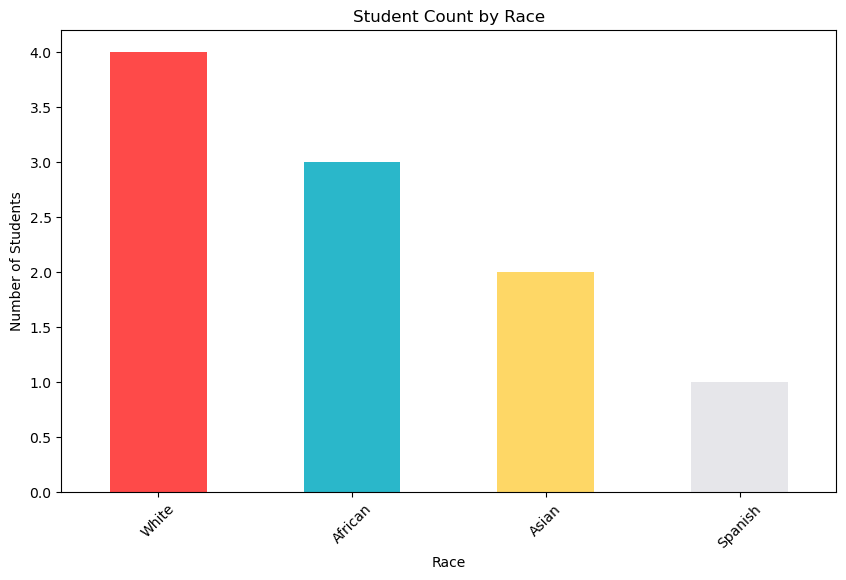

In [249]:
race_counts = demography_df['race'].value_counts()

colors = ['#fe4a49', '#2ab7ca', '#fed766', '#e6e6ea', '#f4f4f8'] * (len(race_counts) // 5 + 1)

plt.figure(figsize=(10, 6))
race_counts.plot(kind='bar', color=colors[:len(race_counts)])  # Slicing to match the number of races
plt.title('Student Count by Race')
plt.xlabel('Race')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.show()

<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">72. Select 25 different random values between 366 to 500. code should generates same value if we run again.</h3>

In [11]:
random.seed(0)

random_values = random.sample(range(366, 501), 25)

print(random_values)


[464, 473, 376, 432, 496, 490, 469, 443, 489, 427, 411, 440, 480, 482, 393, 430, 383, 402, 484, 462, 378, 445, 468, 398, 434]


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">73. Find the max EDA of the higest scoring student (whose average of midterm1,midterm2 and Final is maximum) </h3>

In [213]:
grades_data = pd.read_excel(file_path, sheet_name='Grades')

grades_data['Average Score'] = grades_data[['Midterm 1', 'Midterm 2', 'final']].mean(axis=1)

highest_scoring_student_id = grades_data.loc[grades_data['Average Score'].idxmax(), 'Student_id']

eda_data = pd.read_excel(file_path, sheet_name='EDA')

max_eda_highest_scoring_student = eda_data[eda_data['Student_id'] == highest_scoring_student_id]['EDA'].max()

print(f"The maximum EDA for the highest scoring student (Student ID: {highest_scoring_student_id}) is {max_eda_highest_scoring_student}.")


The maximum EDA for the highest scoring student (Student ID: S08) is 2.92.


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">74. Create a Pie chart for  Grades and explode the wedge with Highest Grade in Final and Label with the Student ID</h3>

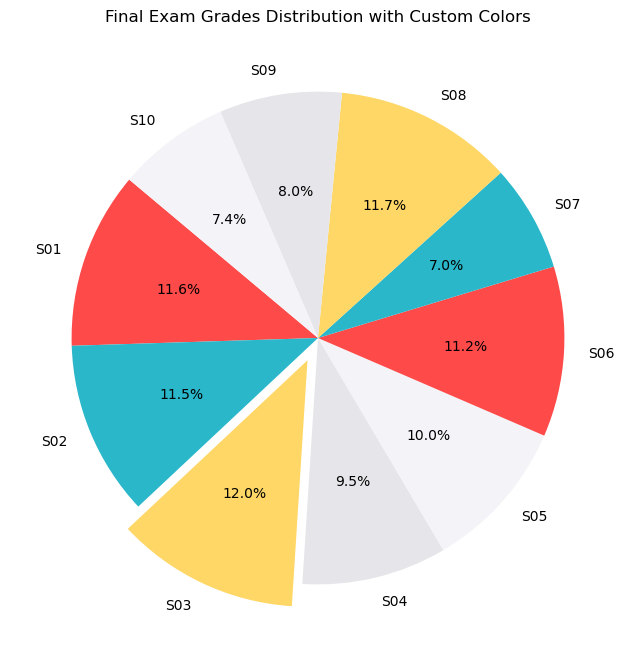

In [214]:
highest_final_grade = grades_df['final'].max()

explode = [0.1 if grade == highest_final_grade else 0 for grade in grades_data['final']]

custom_colors = ['#fe4a49', '#2ab7ca', '#fed766', '#e6e6ea', '#f4f4f8']

colors = custom_colors * (len(grades_data) // len(custom_colors) + 1)

plt.figure(figsize=(10, 8))
plt.pie(grades_data['final'], labels=grades_data['Student_id'], explode=explode, autopct='%1.1f%%', startangle=140, colors=colors[:len(grades_data)])
plt.title('Final Exam Grades Distribution with Custom Colors')
plt.show()


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">75. Find min temparature of the student whose average score (midterm1,midterm2, final) is minimum </h3>

In [215]:
grades_data = pd.read_excel(file_path, sheet_name='Grades')

grades_data['Average Score'] = grades_data[['Midterm 1', 'Midterm 2', 'final']].mean(axis=1)

lowest_scoring_student_id = grades_data.loc[grades_data['Average Score'].idxmin(), 'Student_id']

temp_data = pd.read_excel(file_path, sheet_name='Temp')

min_temp_lowest_scoring_student = temp_data[temp_data['Student_id'] == lowest_scoring_student_id]['TEMP'].min()

print(f"The minimum temperature for the lowest scoring student (Student ID: {lowest_scoring_student_id}) is {min_temp_lowest_scoring_student}.")


The minimum temperature for the lowest scoring student (Student ID: S07) is 16.552.


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">76. Plot the time series of HR( every 5 mins) of student07 </h3>

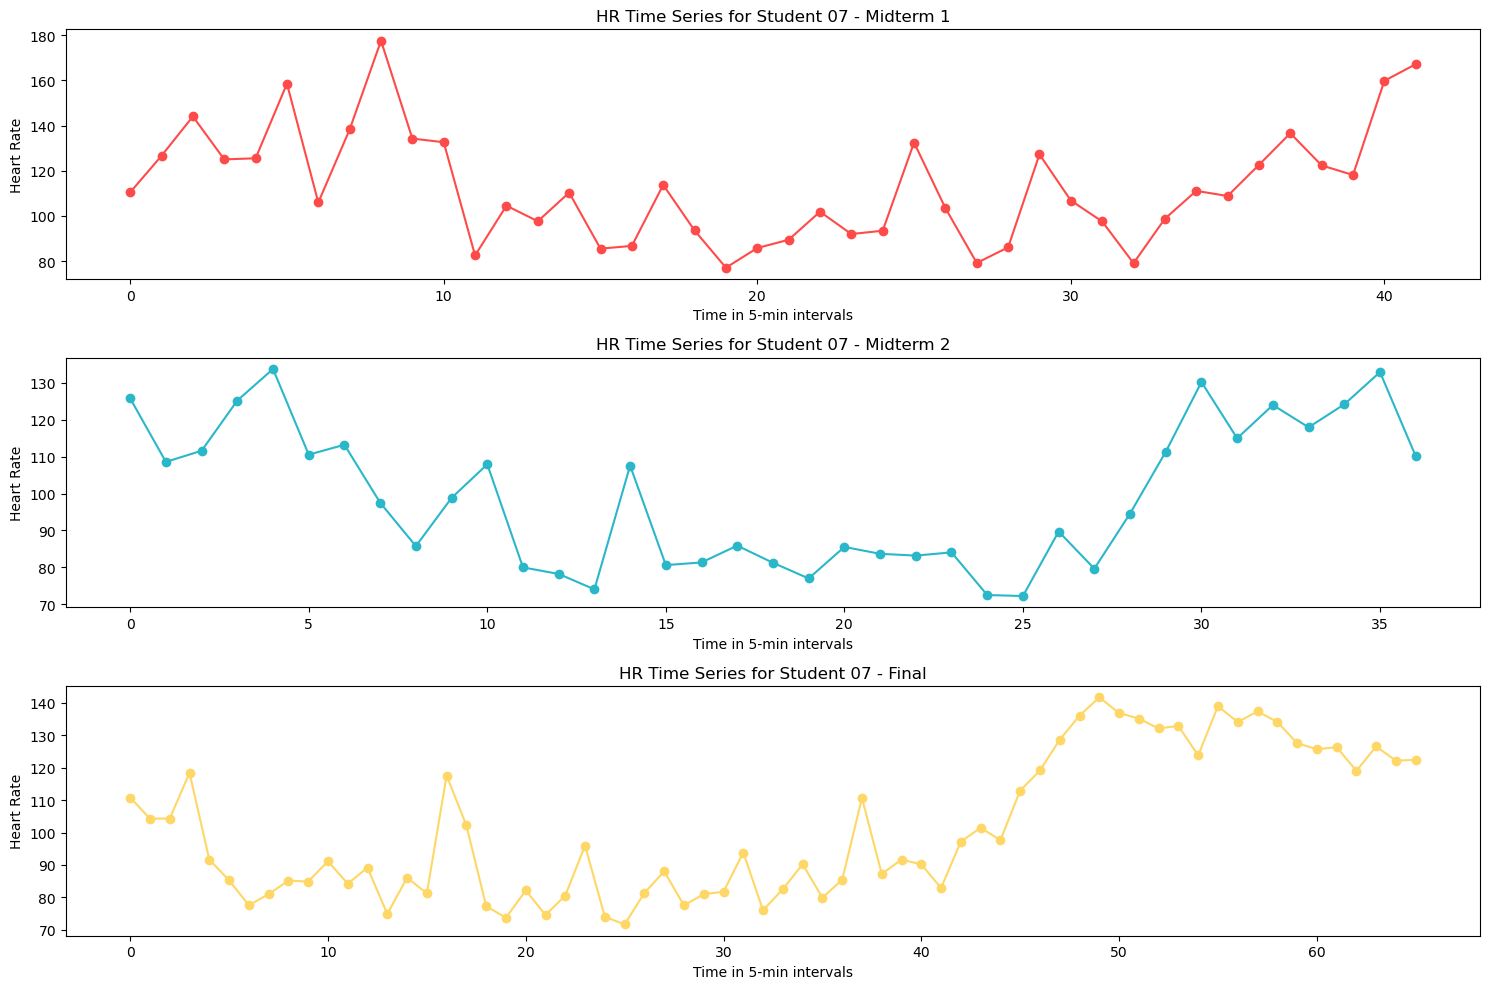

In [251]:
hr_df.columns = hr_df.columns.str.lower()

hr_df['time in mins'] = pd.to_numeric(hr_df['time in mins'], errors='coerce')
hr_df['hr'] = pd.to_numeric(hr_df['hr'], errors='coerce')

student07_hr_data = hr_df[hr_df['student_id'] == 'S07']

midterm1_hr_data = student07_hr_data[student07_hr_data['exam'].str.lower() == 'midterm 1']
midterm2_hr_data = student07_hr_data[student07_hr_data['exam'].str.lower() == 'midterm 2']
final_hr_data = student07_hr_data[student07_hr_data['exam'].str.lower() == 'final']

midterm1_hr_resampled = midterm1_hr_data.groupby(midterm1_hr_data['time in mins'] // 5)['hr'].mean()
midterm2_hr_resampled = midterm2_hr_data.groupby(midterm2_hr_data['time in mins'] // 5)['hr'].mean()
final_hr_resampled = final_hr_data.groupby(final_hr_data['time in mins'] // 5)['hr'].mean()

plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(midterm1_hr_resampled, marker='o', color='#fe4a49')
plt.title('HR Time Series for Student 07 - Midterm 1')
plt.xlabel('Time in 5-min intervals')
plt.ylabel('Heart Rate')

plt.subplot(3, 1, 2)
plt.plot(midterm2_hr_resampled, marker='o', color='#2ab7ca')
plt.title('HR Time Series for Student 07 - Midterm 2')
plt.xlabel('Time in 5-min intervals')
plt.ylabel('Heart Rate')

plt.subplot(3, 1, 3)
plt.plot(final_hr_resampled, marker='o', color='#fed766')
plt.title('HR Time Series for Student 07 - Final')
plt.xlabel('Time in 5-min intervals')
plt.ylabel('Heart Rate')

plt.tight_layout()
plt.show()


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">77. Plot the Density Chart for IBI </h3>

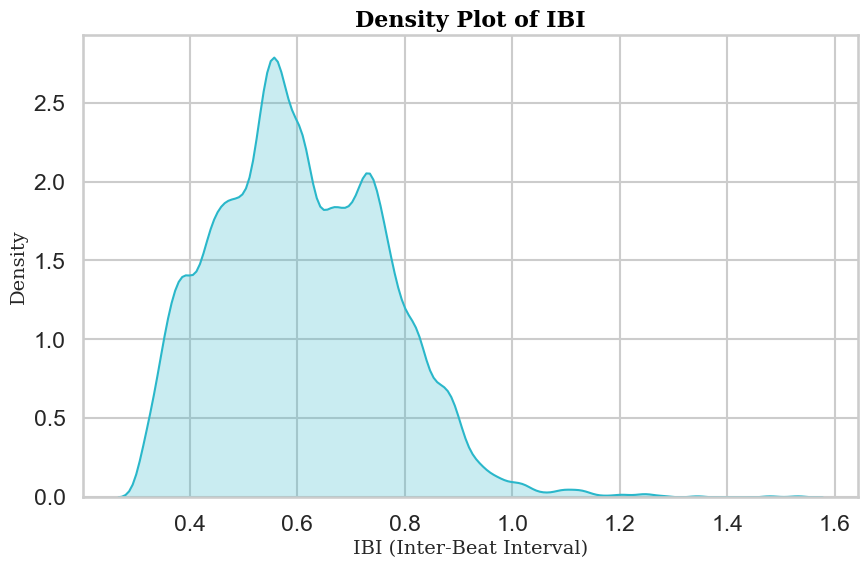

In [253]:
color_for_plot = '#2ab7ca'  # Second color in the palette

sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(10, 6))
sns.kdeplot(ibi_data['IBI'], color=color_for_plot, fill=True, bw_adjust=0.5)  # 'bw_adjust' smoothens the curve

plt.title('Density Plot of IBI', fontdict={'fontfamily': 'serif', 'color': 'black', 'weight': 'bold', 'size': 16})
plt.xlabel('IBI (Inter-Beat Interval)', fontdict={'fontfamily': 'serif', 'size': 14})
plt.ylabel('Density', fontdict={'fontfamily': 'serif', 'size': 14})


# Show the plot
plt.show()


<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">78. Convert gender into numeric by one-hot encoding </h3>

In [219]:
gender_encoded_df = pd.get_dummies(demography_df, columns=['gender'])

gender_encoded_df['gender_F'] = gender_encoded_df['gender_F'].astype(int)
gender_encoded_df['gender_M'] = gender_encoded_df['gender_M'].astype(int)
print(gender_encoded_df.head())

  student_id        dob first name last name     race  gender_F  gender_M
0        S01 2009-01-01    Barbara   Walters    White         1         0
1        S02 2009-02-02       Nora     Jones    White         1         0
2        S03 2009-07-12    Gabriel   Willows    Asian         1         0
3        S04 2009-09-09       John       Doe    Asian         0         1
4        S05 2009-05-06       Jane       Doe  African         1         0


<h3 style="font-family:garamond; font-size:20px; background-color: white; color:#fe4a49; border-radius: 100px 100px; text-align:left">79. Convert ' race' into numeric by Label encoding</h3>

In [221]:
label_encoder = LabelEncoder()

demography_df['race_encoded'] = label_encoder.fit_transform(demography_df['race'])

print("\033[1;37;40m Original and Label Encoded 'Race' Data: \033[0m")  
print(demography_df[['race', 'race_encoded']].head(10).to_string(index=False))  

print("\n") 


 Original and Label Encoded 'Race' Data: 
   race  race_encoded
  White             3
  White             3
  Asian             1
  Asian             1
African             0
African             0
African             0
  White             3
  White             3
Spanish             2




<h3 style="font-family:garamond; font-size:20px; background-color: white; color: #fe4a49; border-radius: 100px 100px; text-align:left">80. Create a Regression Plot on Max EDA and mean HR </h3>

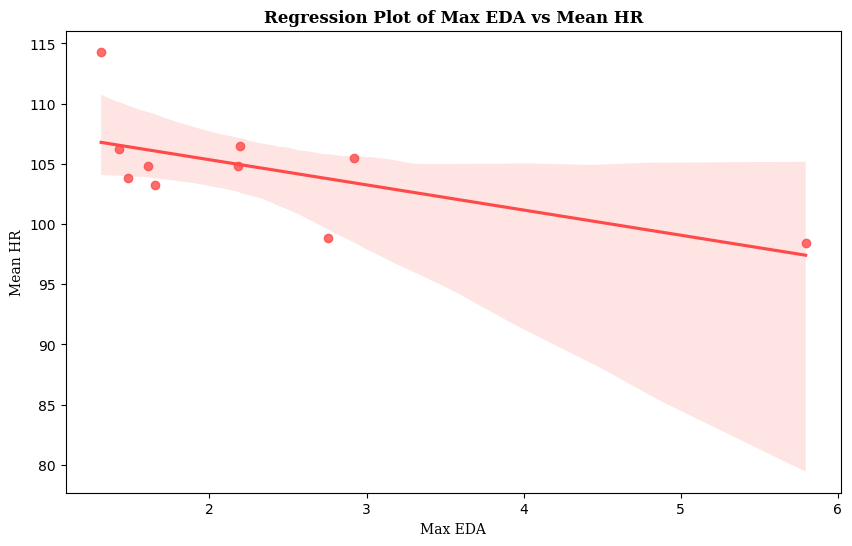

In [222]:
eda_data = pd.read_excel(file_path, sheet_name='EDA')
hr_data = pd.read_excel(file_path, sheet_name='HR')

max_eda = eda_data.groupby('Student_id')['EDA'].max().reset_index()
mean_hr = hr_data.groupby('Student_id')['HR'].mean().reset_index()

merged_data = pd.merge(max_eda, mean_hr, on='Student_id')

sns.set_palette(['#fe4a49', '#2ab7ca', '#fed766', '#e6e6ea', '#f4f4f8'])
plt.figure(figsize=(10, 6))
sns.regplot(x='EDA', y='HR', data=merged_data, color='#fe4a49')  # Using the first color from the palette
plt.title('Regression Plot of Max EDA vs Mean HR', fontdict={'fontfamily': 'serif', 'color': 'black', 'weight': 'bold'})
plt.xlabel('Max EDA', fontdict={'fontfamily': 'serif'})
plt.ylabel('Mean HR', fontdict={'fontfamily': 'serif'})
plt.show()
